<a href="https://colab.research.google.com/github/tdbartolo/tdbartolo-rep/blob/main/MVP_billionaries_statistics_tamara_Revisado_v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

### Aluna: Tamara Di Bartolo


## 1. Definição do Problema

###**1.1.Qual é a descrição do problema?**

O problema consiste em classificar bilionários com base em uma variável chamada "selfMade", que indica se alcançaram sua fortuna por mérito próprio (TRUE) ou herdaram a riqueza (FALSE). O objetivo é criar um modelo de classificação que possa prever se um bilionário é "selfMade" com base em outras características disponíveis no conjunto de dados.

###**1.2.Este é um problema de aprendizado supervisionado ou não supervisionado?**

Este é um problema de aprendizado supervisionado, pois temos uma variável de saída ("selfMade") que é usada para treinar e avaliar o modelo. A tarefa consiste em classificar os bilionários em duas categorias: "selfMade" e "não selfMade".

###**1.3.Que premissas ou hipóteses você tem sobre o problema?**
**Premissa**: A variável "selfMade" é uma medida precisa da origem da riqueza dos bilionários. Acredita-se que essa variável fornece uma representação fiel de como os bilionários alcançaram sua fortuna. A confiabilidade dessa medida é essencial para o sucesso do modelo de classificação.

**Hipóteses:**

**i. Proporção de Origens de Riqueza:**

Hipótese: A proporção de bilionários que herdaram sua riqueza é maior do que a proporção de bilionários "selfmade".
Justificativa: Parte-se da premissa de que, globalmente, há uma tendência maior de herança de riqueza do que de conquista individual.

**ii. Disparidade de Gênero na Origem da Riqueza:**

Hipótese: A origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens tendo alcançado seu status por méritos próprios em comparação com as bilionárias mulheres. Justificativa: Considerando contextos históricos e sociais, a hipótese explora se os homens bilionários são mais propensos a terem construído suas fortunas através de conquistas pessoais.

**iii. Influência da Idade na Origem da Riqueza:**

Hipótese: Bilionários mais velhos têm uma probabilidade maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. Justificativa: A suposição é que a experiência e o conhecimento acumulado ao longo dos anos podem contribuir para uma maior incidência de conquista individual entre os bilionários mais velhos.

**iv. Indústria de Tecnologia:**

Hipótese: A indústria de Tecnologia é a mais comum entre os bilionários "selfMade".
Justificativa: A rápida ascensão de bilionários na indústria de Tecnologia sugere que essa área pode ser uma fonte proeminente de fortunas construídas por mérito próprio.</br>


**v. Relação entre Produto Interno Bruto (PIB) e Herança de Riqueza:**

Hipótese: Em países com maior Produto Interno Bruto, a proporção de bilionários que herdou a riqueza é maior. Justificativa: A ideia subjacente é que em economias mais robustas, as oportunidades de herança de riqueza podem ser mais amplas.</b>


Essas hipóteses e premissas são fundamentais para a abordagem da análise exploratória dos dados e a seleção de variáveis relevantes para o modelo de classificação. Elas são guias importantes para entender as dinâmicas por trás da variável "selfMade" e para interpretar os resultados do modelo.



###**1.4.Que restrições ou condições foram impostas para selecionar os dados?**
 Os dados parecem ser centrados em bilionários do ranking mais alto, mas não é especificado qual é o critério para a inclusão ou exclusão de bilionários no conjunto de dados.
Não são fornecidas informações sobre a fonte dos dados, o que pode impactar a confiabilidade das informações.


###**1.5.Definição de atributos do conjunto de dados:**

Dataset disponível em https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset/data.
 Contém informações detalhadas sobre bilionários, incluindo características como fortuna, idade, país de origem, fonte de riqueza e a variável de saída "selfMade".

<u>**rank:** </u>Classificação do bilionário.

<u>**finalWorth:**</u> Fortuna final do bilionário em milhões de dólares.

**category:** Categoria à qual o bilionário pertence.

**personName:** Nome do bilionário.

<u>**age:**</u> Idade do bilionário.

**country:** País de origem do bilionário.

**city:** Cidade de origem do bilionário.

**source:** Fonte da riqueza do bilionário.

<u>**industries:**</u> Indústrias associadas ao bilionário.

**ctzship:** País de cidadania do bilionário.

**organization:** Organização associada ao bilionário.

**status:** Status do bilionário.

<u>**gender:**</u> Gênero do bilionário.

**birthDate:** Data de nascimento do bilionário.

**lastName:** Sobrenome do bilionário.

**firstName:** Nome do bilionário.

**title:** Título ou posição do bilionário.

**date:** Data da informação.

**state:** Estado de origem do bilionário.

**resStateRgn:** Região do estado de residência do bilionário.

**birthYear:** Ano de nascimento do bilionário.

**birthMonth:** Mês de nascimento do bilionário.

**birthDay:** Dia de nascimento do bilionário.


<u>**cpiCtry:**</u> Índice de Preços ao Consumidor do país (aumento de preços em relação ao  ano-base de 2003 (igual a 100)).

**cpiChgCtry:** Mudança no Índice de Preços ao Consumidor do país.

<u>**gdpCtry:**</u> Produto Interno Bruto do país.

<u>**tertiaryEnroll:**</u> Inscrição bruta no ensino superior no país.

<u>**primaryEnrollCtry:**</u> Inscrição bruta no ensino primário no país.

<u>**lifeExpectCtry:**</u> Expectativa de vida no país.

<u>**taxRevCtry:**</u> Receita fiscal do país.

<u>**totalTaxRate:**</u> Taxa de imposto total no país.

<u>**populationCtry:**</u> População do país.

**latitudeCtry:** Latitude do país.

**longitudeCtry:** Longitude do país.

<u>**selfMade:**</u> Variável de saída indicando se o bilionário é "selfMade" (TRUE) ou não (FALSE).

In [48]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install missingno
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [49]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de dados e seleção preliminar dos atributos

Nesta seção, realiza-se a carga de um conjunto de dados sobre bilionários a partir de uma URL específica usando a biblioteca Pandas. O conjunto de dados é inicialmente definido com colunas específicas. Após a leitura do arquivo CSV, as colunas são renomeadas para terem no máximo 10 caracteres. Além disso, a coluna 'selfMade' é movida para o final do conjunto de dados, organizando-o de acordo com os requisitos específicos. A função dataset.head() é usada para exibir as primeiras linhas do DataFrame permitindo uma visão rápida dos dados. O resultado é um DataFrame pronto para análises subsequentes, adaptado conforme as necessidades do projeto.

In [50]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/tdbartolo/tdbartolo-rep/main/mvp-analise-de-dados-e-boas-praticas/Billionaires%20Statistics%20Dataset.csv"

# Informa o cabeçalho das colunas
colunas = ['rank', 'finalWorth',	'category', 'personName',	'age',	'country',	'city',	'source',	'industries',	'countryOfCitizenship',	'organization',	'selfMade',	'status', 'gender',	'birthDate',	'lastName',	'firstName',	'title',	'date',	'state',	'residenceStateRegion',	'birthYear',	'birthMonth',	'birthDay',	'cpi_country',	'cpi_change_country',	'gdp_country',	'gross_tertiary_education_enrollment',	'gross_primary_education_enrollment_country',	'life_expectancy_country',	'tax_revenue_country_country',	'total_tax_rate_country',	'population_country',	'latitude_country',	'longitude_country']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Renomeia as colunas para até 10 caracteres
dataset.columns = ['rank', 'finalWorth', 'category', 'personName', 'age', 'country', 'city', 'source', 'industries',
                   'ctzship', 'organization', 'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
                   'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiCtry',
                   'cpiChgCtry', 'gdpCtry', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'taxRevCtry',
                   'totalTaxRate', 'populationCtry', 'latitudeCtry', 'longitudeCtry']

# Mover a coluna 'selfMade' para o final
dataset = dataset[[col for col in dataset.columns if col != 'selfMade'] + ['selfMade']]


In [51]:
pd.set_option('display.max_columns', None)
dataset.head()

rank  finalWorth               category                personName   age  \
0     1      211000       Fashion & Retail  Bernard Arnault & family  74.0   
1     2      180000             Automotive                 Elon Musk  51.0   
2     3      114000             Technology                Jeff Bezos  59.0   
3     4      107000             Technology             Larry Ellison  78.0   
4     5      106000  Finance & Investments            Warren Buffett  92.0   

         country    city              source             industries  \
0         France   Paris                LVMH       Fashion & Retail   
1  United States  Austin       Tesla, SpaceX             Automotive   
2  United States  Medina              Amazon             Technology   
3  United States   Lanai              Oracle             Technology   
4  United States   Omaha  Berkshire Hathaway  Finance & Investments   

         ctzship                      organization status gender  \
0         France  LVMH Moët Hennessy Louis Vuitton      U      M   
1  United States                             Tesla      D      M   
2  United States                            Amazon      D      M   
3  United States                            Oracle      U      M   
4  United States    Berkshire Hathaway Inc. (Cl A)      D      M   

        birthDate lastName firstName                 title           date  \
0   3/5/1949 0:00  Arnault   Bernard      Chairman and CEO  4/4/2023 5:01   
1  6/28/1971 0:00     Musk      Elon                   CEO  4/4/2023 5:01   
2  1/12/1964 0:00    Bezos      Jeff  Chairman and Founder  4/4/2023 5:01   
3  8/17/1944 0:00  Ellison     Larry       CTO and Founder  4/4/2023 5:01   
4  8/30/1930 0:00  Buffett    Warren                   CEO  4/4/2023 5:01   

        state resStateRgn  birthYear  birthMonth  birthDay  cpiCtry  \
0         NaN         NaN     1949.0         3.0       5.0   110.05   
1       Texas       South     1971.0         6.0      28.0   117.24   
2  Washington        West     1964.0         1.0      12.0   117.24   
3      Hawaii        West     1944.0         8.0      17.0   117.24   
4    Nebraska     Midwest     1930.0         8.0      30.0   117.24   

   cpiChgCtry               gdpCtry  tertiaryEnroll  primaryEnrollCtry  \
0         1.1   $2,715,518,274,227             65.6              102.5   
1         7.5  $21,427,700,000,000             88.2              101.8   
2         7.5  $21,427,700,000,000             88.2              101.8   
3         7.5  $21,427,700,000,000             88.2              101.8   
4         7.5  $21,427,700,000,000             88.2              101.8   

   lifeExpectCtry  taxRevCtry  totalTaxRate  populationCtry  latitudeCtry  \
0            82.5        24.2          60.7      67059887.0     46.227638   
1            78.5         9.6          36.6     328239523.0     37.090240   
2            78.5         9.6          36.6     328239523.0     37.090240   
3            78.5         9.6          36.6     328239523.0     37.090240   
4            78.5         9.6          36.6     328239523.0     37.090240   

   longitudeCtry  selfMade  
0       2.213749     False  
1     -95.712891      True  
2     -95.712891      True  
3     -95.712891      True  
4     -95.712891      True

In [52]:
#Apresenta uma visão com a quantidade de valores distintos para cada atributo. Permite avaliar atributos com valores únicos que poderão ser desconsiderados na redução de dimensionalidade.
dataset.nunique()

rank                  219
finalWorth            219
category               18
personName           2638
age                    79
country                78
city                  741
source                906
industries             18
ctzship                77
organization          294
status                  6
gender                  2
birthDate            2060
lastName             1736
firstName            1770
title                  97
date                    2
state                  45
resStateRgn             5
birthYear              77
birthMonth             12
birthDay               31
cpiCtry                63
cpiChgCtry             44
gdpCtry                68
tertiaryEnroll         63
primaryEnrollCtry      60
lifeExpectCtry         54
taxRevCtry             57
totalTaxRate           63
populationCtry         68
latitudeCtry           68
longitudeCtry          68
selfMade                2
dtype: int64


Abaixo vamos realizar a redução de dimensionalidade com o intuito de otimizar a eficiência computacional e reduzir a complexidade do conjunto de dados. Os atributos 'category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiChgCtry', 'taxRevCtry', 'latitudeCtry', 'longitudeCtry' foram removidos imediatamente após o carregamento, visando eliminar características irrelevantes, reduzir ruídos e dependências lineares entre os atributos, como variáveis correlacionadas.

A exclusão desses atributos é justificada pela presença de **informações redundantes ou únicas** para cada bilionário, como os nomes ('personName', 'lastName', 'firstName') e cidades de origem. Esses atributos não contribuem significativamente para o modelo de aprendizado de máquina e podem até mesmo prejudicar o desempenho, induzindo ao overfitting.

Além disso, a exclusão de variáveis únicas (observado no código acima) evita um aumento desnecessário na dimensionalidade dos dados. Foi observado que manter certas variáveis únicas não agrega valor ao modelo e pode complicar a análise.

A escolha de manter o atributo 'age' e excluir os atributos 'birthDate', 'birthYear', 'birthMonth' e 'birthDay' foi motivada pela redundância de informações contidas nesses últimos em relação à idade. Da mesma forma, 'totalTaxRate' já fornece uma medida abrangente da carga tributária, incluindo todas as formas de impostos em relação à atividade econômica e a inclusão de taxRevCtry poderia ser redundante. O mesmo pode ser verificado em relação ao atributo cpiCtry que já fornece informações suficientes sobre o Índice de Preços ao Consumidor do país e a inclusão de cpiChgCtry poderia ser redundante.

A decisão de manter 'gdpcountry' e excluir 'country', 'city', 'latitudeCtry' e 'longitudeCtry' foi tomada com base na relevância do Produto Interno Bruto (GDP) do país em comparação com as informações específicas de localização e país.  

Além disso, a exclusão dos atributos 'category' foi realizada visando eliminar informações redundantes e simplificar a representação do conjunto de dados. A categoria à qual o bilionário pertence ('category') foi removida em favor da manutenção do atributo 'industries', que oferece informações mais específicas e relevantes sobre as áreas de atuação dos bilionários. Essa abordagem visa preservar informações essenciais enquanto simplifica o conjunto de dados.

In [53]:
# Exclui as variáveis 'lastName', 'firstName', 'personName', 'city'
dataset = dataset.drop(['category', 'personName', 'country', 'city', 'source', 'ctzship', 'organization', 'status', 'birthDate', 'lastName', 'firstName', 'title', 'date', 'state', 'resStateRgn', 'birthYear', 'birthMonth', 'birthDay', 'cpiChgCtry', 'taxRevCtry', 'latitudeCtry', 'longitudeCtry'], axis=1)

dataset.head()

rank  finalWorth   age             industries gender  cpiCtry  \
0     1      211000  74.0       Fashion & Retail      M   110.05   
1     2      180000  51.0             Automotive      M   117.24   
2     3      114000  59.0             Technology      M   117.24   
3     4      107000  78.0             Technology      M   117.24   
4     5      106000  92.0  Finance & Investments      M   117.24   

                gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
0   $2,715,518,274,227             65.6              102.5            82.5   
1  $21,427,700,000,000             88.2              101.8            78.5   
2  $21,427,700,000,000             88.2              101.8            78.5   
3  $21,427,700,000,000             88.2              101.8            78.5   
4  $21,427,700,000,000             88.2              101.8            78.5   

   totalTaxRate  populationCtry  selfMade  
0          60.7      67059887.0     False  
1          36.6     328239523.0      True  
2          36.6     328239523.0      True  
3          36.6     328239523.0      True  
4          36.6     328239523.0      True

O trecho a seguir realiza a codificação de duas variáveis categóricas ('gender' e 'selfMade') em valores numéricos binários em um DataFrame chamado dataset. Para 'gender', valores 'F' são codificados como 0 e 'M' como 1. Para 'selfMade', valores False são codificados como 0 e True como 1. Essa transformação é útil para permitir o processamento de informações categóricas por algoritmos de aprendizado de máquina que esperam entradas numéricas.

In [54]:
# Transforma a variável 'gender' em 0 e 1
gender_mapping = {'F': 0, 'M': 1}
dataset['gender'] = dataset['gender'].map(gender_mapping)

# Transforma a variável 'selfMade' em 0 e 1
selfmade_mapping = {False: 0, True: 1}
dataset['selfMade'] = dataset['selfMade'].map(selfmade_mapping)

## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Nesta etapa daremos início à exploração detalhada do dataset, buscando compreender suas principais características e propriedades. Inicialmente, examinaremos as dimensões do conjunto de dados para ter uma visão geral de sua extensão. Em seguida, nos aprofundaremos nas informações gerais fornecidas pelo dataset, abordando aspectos cruciais, como a presença de valores ausentes, a distribuição de variáveis-chave e a natureza das características incluídas. Para ilustrar a diversidade do conjunto de dados, apresentaremos alguns exemplos representativos de suas linhas. Essa análise preliminar proporcionará um contexto valioso para as análises subsequentes, estabelecendo as bases para uma compreensão mais aprofundada e verificação das hipóteses propostas nesse trabalho.

In [55]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2640, 13)


In [56]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2640 non-null   int64  
 1   finalWorth         2640 non-null   int64  
 2   age                2575 non-null   float64
 3   industries         2640 non-null   object 
 4   gender             2640 non-null   int64  
 5   cpiCtry            2456 non-null   float64
 6   gdpCtry            2476 non-null   object 
 7   tertiaryEnroll     2458 non-null   float64
 8   primaryEnrollCtry  2459 non-null   float64
 9   lifeExpectCtry     2458 non-null   float64
 10  totalTaxRate       2458 non-null   float64
 11  populationCtry     2476 non-null   float64
 12  selfMade           2640 non-null   int64  
dtypes: float64(7), int64(4), object(2)
memory usage: 268.2+ KB
None


In [57]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

rank  finalWorth   age             industries  gender  cpiCtry  \
0     1      211000  74.0       Fashion & Retail       1   110.05   
1     2      180000  51.0             Automotive       1   117.24   
2     3      114000  59.0             Technology       1   117.24   
3     4      107000  78.0             Technology       1   117.24   
4     5      106000  92.0  Finance & Investments       1   117.24   
5     6      104000  67.0             Technology       1   117.24   
6     7       94500  81.0  Media & Entertainment       1   117.24   
7     8       93000  83.0                Telecom       1   141.54   
8     9       83400  65.0            Diversified       1   180.44   
9    10       80700  67.0             Technology       1   117.24   

                gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
0   $2,715,518,274,227             65.6              102.5            82.5   
1  $21,427,700,000,000             88.2              101.8            78.5   
2  $21,427,700,000,000             88.2              101.8            78.5   
3  $21,427,700,000,000             88.2              101.8            78.5   
4  $21,427,700,000,000             88.2              101.8            78.5   
5  $21,427,700,000,000             88.2              101.8            78.5   
6  $21,427,700,000,000             88.2              101.8            78.5   
7   $1,258,286,717,125             40.2              105.8            75.0   
8   $2,611,000,000,000             28.1              113.0            69.4   
9  $21,427,700,000,000             88.2              101.8            78.5   

   totalTaxRate  populationCtry  selfMade  
0          60.7    6.705989e+07         0  
1          36.6    3.282395e+08         1  
2          36.6    3.282395e+08         1  
3          36.6    3.282395e+08         1  
4          36.6    3.282395e+08         1  
5          36.6    3.282395e+08         1  
6          36.6    3.282395e+08         1  
7          55.1    1.260140e+08         1  
8          49.7    1.366418e+09         0  
9          36.6    3.282395e+08         1

In [58]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

rank  finalWorth   age        industries  gender  cpiCtry  \
2630  2540        1000  35.0     Manufacturing       0      NaN   
2631  2540        1000  54.0  Fashion & Retail       1   125.08   
2632  2540        1000  59.0     Manufacturing       1   125.08   
2633  2540        1000  53.0     Manufacturing       1   125.08   
2634  2540        1000  63.0        Healthcare       1   125.08   
2635  2540        1000  51.0        Healthcare       1   125.08   
2636  2540        1000  80.0   Food & Beverage       1   117.24   
2637  2540        1000  60.0     Manufacturing       1   125.08   
2638  2540        1000  71.0       Real Estate       1   125.08   
2639  2540        1000  66.0       Diversified       1   129.61   

                   gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
2630                   NaN             NaN                NaN             NaN   
2631  $19,910,000,000,000             50.6              100.2            77.0   
2632  $19,910,000,000,000             50.6              100.2            77.0   
2633  $19,910,000,000,000             50.6              100.2            77.0   
2634  $19,910,000,000,000             50.6              100.2            77.0   
2635  $19,910,000,000,000             50.6              100.2            77.0   
2636  $21,427,700,000,000             88.2              101.8            78.5   
2637  $19,910,000,000,000             50.6              100.2            77.0   
2638  $19,910,000,000,000             50.6              100.2            77.0   
2639     $376,795,508,680             35.5              107.5            71.1   

      totalTaxRate  populationCtry  selfMade  
2630           NaN             NaN         0  
2631          59.2    1.397715e+09         1  
2632          59.2    1.397715e+09         1  
2633          59.2    1.397715e+09         1  
2634          59.2    1.397715e+09         1  
2635          59.2    1.397715e+09         1  
2636          36.6    3.282395e+08         0  
2637          59.2    1.397715e+09         1  
2638          59.2    1.397715e+09         1  
2639          43.1    1.081166e+08         0

Observando as primeiras e últimas linhas do dataset verificamos a predominância de campos numéricos, e somente um campo categórico "industries". Podemos destacar alguns pontos que devem ser tratados:

1. Valor faltante (NaN)
2. Uso do símbolo de moeda do campo gdpCtry
3. Campo categórico "Industries"

No código abaixo eliminamos o símbolo "$" do atributo **gdpCtry** e convertemos em campo numérico.

In [59]:
# Remove o símbolo '$' e converte para tipo numérico
dataset['gdpCtry'] = pd.to_numeric(dataset['gdpCtry'].replace('[\$,]', '', regex=True), errors='coerce')

O resumo estatístico abaixo engloba informações de 2640 bilionários, destacando-se por uma ampla variedade de características. Abaixo alguns insights para melhorar o entendimento inicial dos dados:  
1. Fortuna final média de aproximadamente $4.6 bilhões.
2. A idade média é de cerca de 65 anos.
3. Predominância masculina, com uma média de 0.87 no indicador de gênero.
4. As variáveis relacionadas aos países dos bilionários, como o Índice de Preços ao Consumidor (cpiCtry) e o Produto Interno Bruto (gdpCtry), oferecem insights sobre o ambiente econômico.
5. A expectativa de vida média nos países dos bilionários é de 78.12 anos
6. A taxa total de imposto média é de aproximadamente 43.96%.

7. Em relação à origem da riqueza, cerca de 68.64% dos bilionários alcançaram seu status por méritos próprios. O que apresenta um certo nível de desbalancemento em relação à classe que queremos determinar.

In [60]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

rank     finalWorth          age       gender      cpiCtry  \
count  2640.000000    2640.000000  2575.000000  2640.000000  2456.000000   
mean   1289.159091    4623.787879    65.140194     0.872348   127.755204   
std     739.693726    9834.240939    13.258098     0.333765    26.452951   
min       1.000000    1000.000000    18.000000     0.000000    99.550000   
25%     659.000000    1500.000000    56.000000     1.000000   117.240000   
50%    1312.000000    2300.000000    65.000000     1.000000   117.240000   
75%    1905.000000    4200.000000    75.000000     1.000000   125.080000   
max    2540.000000  211000.000000   101.000000     1.000000   288.570000   

            gdpCtry  tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  \
count  2.476000e+03     2458.000000        2459.000000     2458.000000   
mean   1.158287e+13       67.225671         102.858520       78.122823   
std    9.575588e+12       21.343426           4.710977        3.730099   
min    3.154058e+09        4.000000          84.700000       54.300000   
25%    1.736426e+12       50.600000         100.200000       77.000000   
50%    1.991000e+13       65.600000         101.800000       78.500000   
75%    2.142770e+13       88.200000         102.600000       80.900000   
max    2.142770e+13      136.600000         142.100000       84.200000   

       totalTaxRate  populationCtry     selfMade  
count   2458.000000    2.476000e+03  2640.000000  
mean      43.963344    5.102053e+08     0.686364  
std       12.145296    5.542447e+08     0.464058  
min        9.900000    3.801900e+04     0.000000  
25%       36.600000    6.683440e+07     0.000000  
50%       41.200000    3.282395e+08     1.000000  
75%       59.100000    1.366418e+09     1.000000  
max      106.300000    1.397715e+09     1.000000

Abaixo confirmamos a existência de um desequilíbrio entre as classes 0 (não selfMade) e 1 (selfMade). Mais a frente vamos ilustrar uma possível forma para tratamento desse desbalanceamento.

In [61]:
# distribuição das classes
print(dataset.groupby('selfMade').size())

selfMade
0     828
1    1812
dtype: int64


In [62]:
# distribuição das classes
print(dataset.groupby('gender').size())

gender
0     337
1    2303
dtype: int64


## 3.2. Visualizações Unimodais

A seguir vamos utilizar as visualizações unimodais com Histogramas, gráficos de densidade e gráficos de caixa (box plots). Essas representações visuais ajudam a identificar padrões, tendências e características importantes nos dados, permitindo uma compreensão mais profunda da distribuição das variáveis. Após essa melhor compreensão vamos iniciar a análise das hipótestes em conjunto com as visualizações multimodais.




### Histograma

Nesta seção, elaboramos uma série de histogramas que oferecem uma representação visual das distribuições individuais de cada atributo em nosso conjunto de dados.
Com o histograma podemos verificar a distribuição de cada atribuito e entender se há concentração em faixas específicas. Essa análise pode ser observada facilmente abaixo nos atributos de idade, sexo e expectativa de vida, por exemplo.

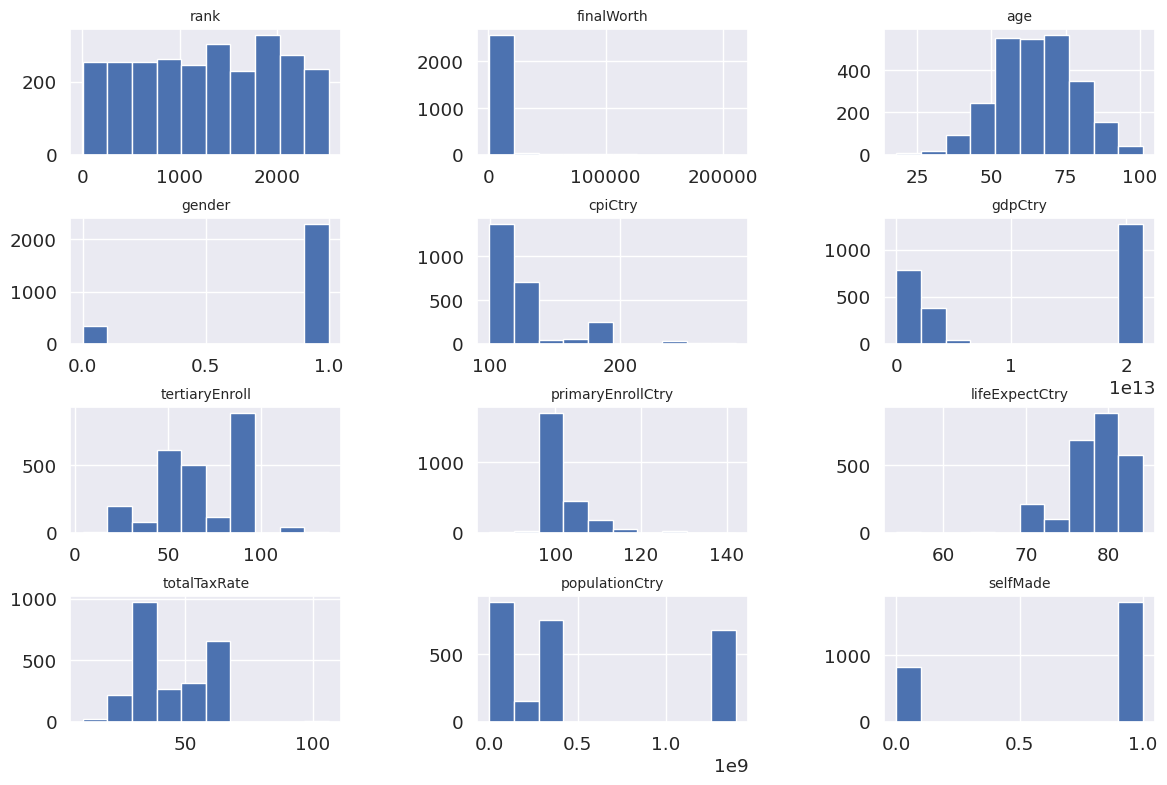

In [63]:
# Gere o histograma
ax_array = dataset.hist(figsize=(14, 9))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Reduza o tamanho da fonte de todos os textos
for ax in ax_array.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Ajuste o valor de fontsize conforme necessário

# Exiba o gráfico
plt.show()

### Gráfico de Densidade
O Density Plot, ou Gráfico de Densidade, guarda semelhanças com o histograma, embora apresente uma visualização ligeiramente diferente. Este tipo de gráfico facilita a identificação da distribuição dos atributos no conjunto de dados. Assim como fizemos com o histograma, iremos gerar um density plot para cada atributo do dataset.


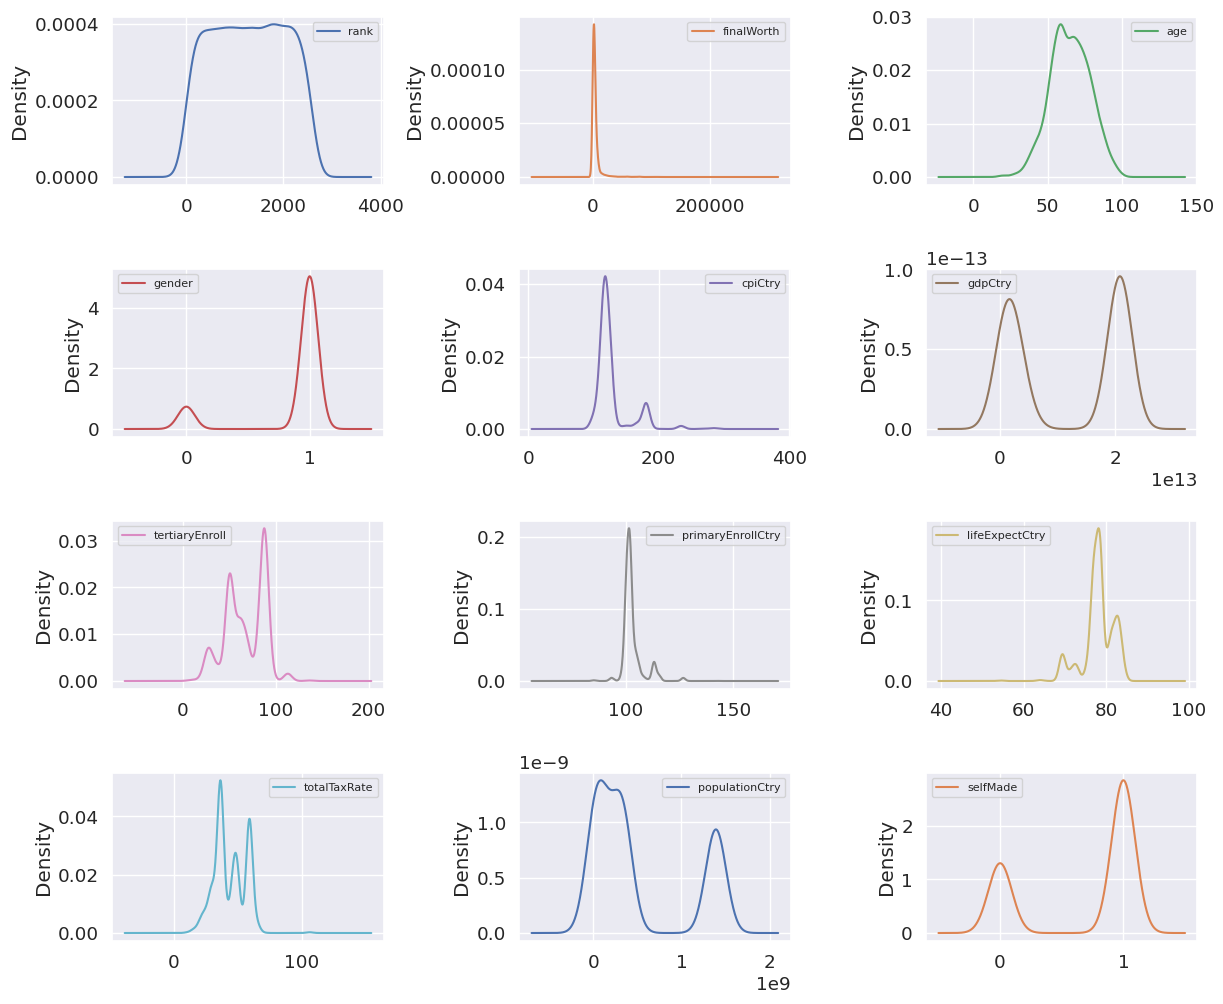

In [64]:
# Gere o gráfico de densidade
ax_array = dataset.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(14, 12))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Reduza o tamanho da fonte de todos os textos (títulos e legenda)
for ax in ax_array.flatten():
    ax.set_title(ax.get_title(), fontsize=10)  # Ajuste o valor de fontsize conforme necessário
    ax.legend(fontsize=8)  # Ajuste o valor de fontsize conforme necessário para a legenda

# Exiba o gráfico
plt.show()

### Boxplot
A representação gráfica do boxplot oferece mais insights sobre a dispersão dos dados e a identificação de possíveis valores atípicos. </br>

Como exemplo, podemos analisar o atributo "fortuna final dos bilionários" representada no atributo finalWorth possui uma distribuição fortemente assimétrica, com uma média (2,3 milhões USD) significativamente menor que o valor máximo (211 milhões USD), indicando a presença de valores discrepantes (outliers).</br>
O atributo expectativa de vida (lifeExpectCtry) está concentrado entre 77 e 80 anos com mediana e média em 78 anos. No boxplot verificamos a presença de alguns outliers com a expectativa de vida em 54 anos.</br>
A distribuição do índice de preços ao consumidor (cpi) é uma distribuição assimétrica a direita com média em 127 (um aumento de 27% em relação ao ano base) e mediana em 117, sendo o primeiro e o terceiro quartis em 117 e 125, respectivemente. O boxplot permite verificar a presença de alguns outliers, com máximo e mínimo em 288 e 99,55.</br>
Uma outra visualização muito clara é no atributo idade mostrando a média e a mediana em 65 anos, uma distribuição predominantemente simétrica, com o primeiro e terceiro quartis em 56 e 75 anos, respectivamente. Os outliers são bilionários mais jovens na faixa dos 20 anos, essa análise deve ser confirmada a seguir na análise detalhada da hipótese de número iii que ajuda nesta visualização.


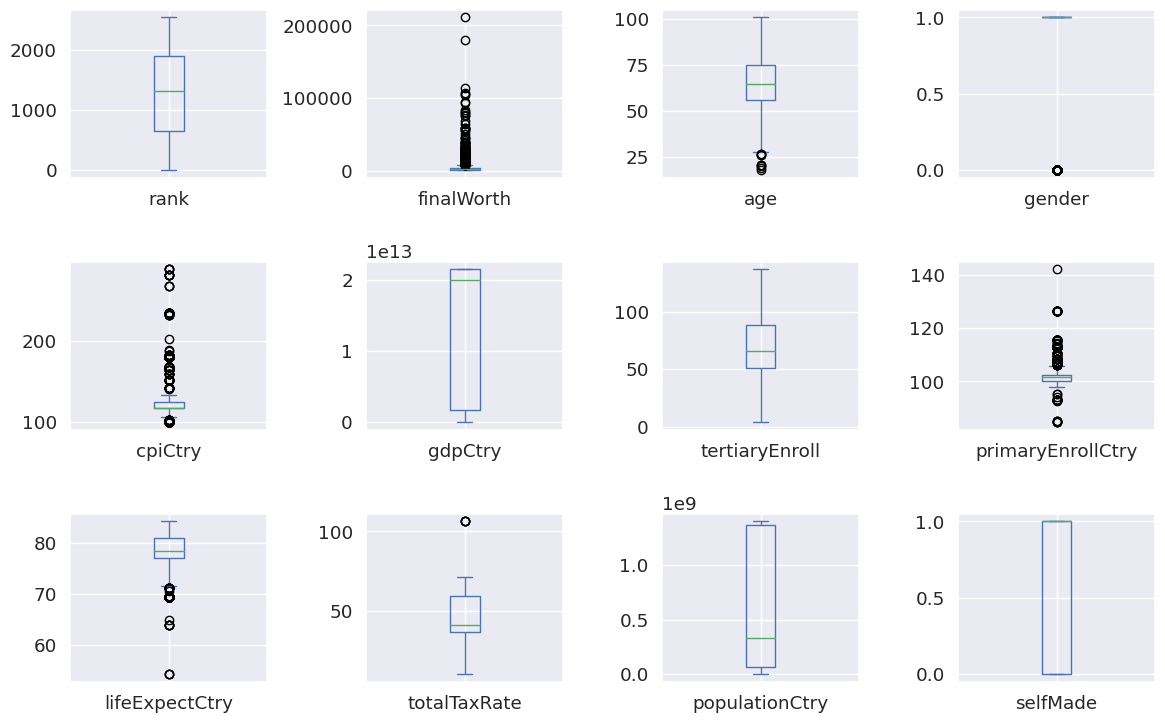

In [65]:
# Boxplot
ax = dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (14,12))

# Ajuste o espaçamento vertical e horizontal
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()

## 3.3. Visualizações Multimodais

Vamos utilizar visualizações multimodais para explicar um pouco melhor os dados e responder as hipóteses propostas nesse trabalho.

###Análise das Hipóteses

**i. Proporção de Origens de Riqueza:** </br>
Hipótese: A proporção de bilionários que herdaram sua riqueza é maior do que a proporção de bilionários "selfmade".
Justificativa: Parte-se da premissa de que, globalmente, há uma tendência maior de herança de riqueza do que de conquista individual.

Resposta: Com base no resumo estatístico, é observado que a média da variável selfMade é de aproximadamente 0,69, indicando que a maioria dos bilionários no dataset construiu suas fortunas por mérito próprio. O gráfico de barras abaixo apresenta de forma ainda mais clara essa proporção. Com isso podemos afirmar que a proporção de bilionários que constroem sua própria fortuna é maior, o que contradiz a hipótese.

In [66]:
# Substitua 'dataset' pelo nome real do seu DataFrame
selfmade_counts = dataset['selfMade'].value_counts()

# Cria o gráfico de barras
fig = px.bar(x=selfmade_counts.index, y=selfmade_counts.values,
             labels={'x': 'Origem da Fortuna', 'y': 'Número de Bilionários'},
             title='Origem da Fortuna dos Bilionários',
             color=selfmade_counts.index,
             color_discrete_map={0: 'red', 1: 'green'})  # Cores para valores 0 e 1

# Personalizações adicionais
fig.update_layout(showlegend=False)
fig.update_traces(marker_line_width=2, marker_line_color='white')

# Adiciona rótulos às barras
fig.add_annotation(
    text=f"{selfmade_counts.index[0]}: {selfmade_counts[0]}",
    x=0,
    y=selfmade_counts[0] / 2,
    showarrow=False,
    font=dict(size=12),
    textangle=0,
    xanchor='right',
)
fig.add_annotation(
    text=f"{selfmade_counts.index[1]}: {selfmade_counts[1]}",
    x=1,
    y=selfmade_counts[1] / 2,
    showarrow=False,
    font=dict(size=12),
    textangle=0,
    xanchor='left',
)

# Exibe o gráfico
fig.show()

**ii. Disparidade de Gênero na Origem da Riqueza:** </br>
Hipótese: A origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens tendo alcançado seu status por méritos próprios em comparação com as bilionárias mulheres. Justificativa: Considerando contextos históricos e sociais, a hipótese explora se os homens bilionários são mais propensos a terem construído suas fortunas através de conquistas pessoais.

Resposta: Com base nos números fornecidos (1716 homens (gender=1) e 96 mulheres (gender=0) entre os bilionários self-made), podemos concluir que há uma disparidade significativa entre homens e mulheres na origem da riqueza. A diferença substancial no número de homens self-made em comparação com mulheres sugere fortemente que, no grupo de bilionários que construíram suas fortunas por méritos próprios, a maioria é composta por homens. Comparativamente, no grupo de bilionários por herança, a proporção de homens permanece maior mas reduz a disparidade com 587 homens (gender=1) e 241 mulheres (gender=0). </br>

A hipótese de que a origem da riqueza varia entre os gêneros, com uma proporção maior de bilionários homens alcançando seu status por méritos próprios, é apoiada pelos números observados. A justificativa fornecida, que considera contextos históricos e sociais, parece ser consistente com a disparidade encontrada nos dados.


In [67]:
# Filtra os dados para incluir apenas bilionários com selfMade=1
selfmade_data = dataset[dataset['selfMade'] == 1]

gender_counts = selfmade_data['gender'].value_counts()

# Cria o gráfico de pizza
fig = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
             title="Distribuição de gênero dos bilionários por mérito próprio",
             color_discrete_sequence=px.colors.qualitative.Plotly,
             hole=0.4)

# Adiciona anotações
gender_labels = gender_counts.index
fig.add_annotation(
    text="<b>Gênero</b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=15),
)
fig.add_annotation(
    text=f"{gender_labels[1]}: {gender_counts[0]}",
    x=0.2,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)
fig.add_annotation(
    text=f"{gender_labels[0]}: {gender_counts[1]}",
    x=0.8,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)

# Exibe o gráfico
fig.show()

In [68]:
# Filtra os dados para incluir apenas bilionários com selfMade=0
selfmade_data = dataset[dataset['selfMade'] == 0]

gender_counts = selfmade_data['gender'].value_counts()

# Cria o gráfico de pizza
fig = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
             title="Distribuição de gênero dos bilionários por herança",
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Configurações adicionais para melhorar a apresentação
fig.update_traces(marker=dict(line=dict(color='white', width=2)))
fig.update_layout(showlegend=False)
fig.update_traces(hole=0.4)

# Adiciona anotações
gender_labels = gender_counts.index
fig.add_annotation(
    text="<b>Gênero</b>",
    x=0.5,
    y=0.5,
    showarrow=False,
    font=dict(size=15),
)
fig.add_annotation(
    text=f"{gender_labels[1]}: {gender_counts[0]}",
    x=0.2,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)
fig.add_annotation(
    text=f"{gender_labels[0]}: {gender_counts[1]}",
    x=0.8,
    y=0.75,
    showarrow=False,
    font=dict(size=12),
)

**iii. Influência da Idade na Origem da Riqueza:** </br>
Hipótese: Bilionários mais velhos têm uma probabilidade maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. Justificativa: A suposição é que a experiência e o conhecimento acumulado ao longo dos anos podem contribuir para uma maior incidência de conquista individual entre os bilionários mais velhos.</b>

Resposta: Com base na análise do gráfico de barras empilhadas, a seguir, que mostra a proporção de bilionários "SelfMade" por idade, podemos confirmar que a hipótese relacionada à influência da idade na origem da riqueza é verdadeira. O gráfico revela claramente que bilionários mais velhos têm uma probabilidade significativamente maior de terem construído suas fortunas por mérito próprio em comparação com bilionários mais jovens. A representação visual evidencia que, à medida que a idade dos bilionários aumenta, a proporção de indivíduos que alcançaram seu status por mérito próprio também aumenta consistentemente.

Assim, os resultados obtidos fornecem suporte estatístico à ideia de que a idade desempenha um papel significativo na origem da riqueza entre os bilionários, validando a hipótese formulada.

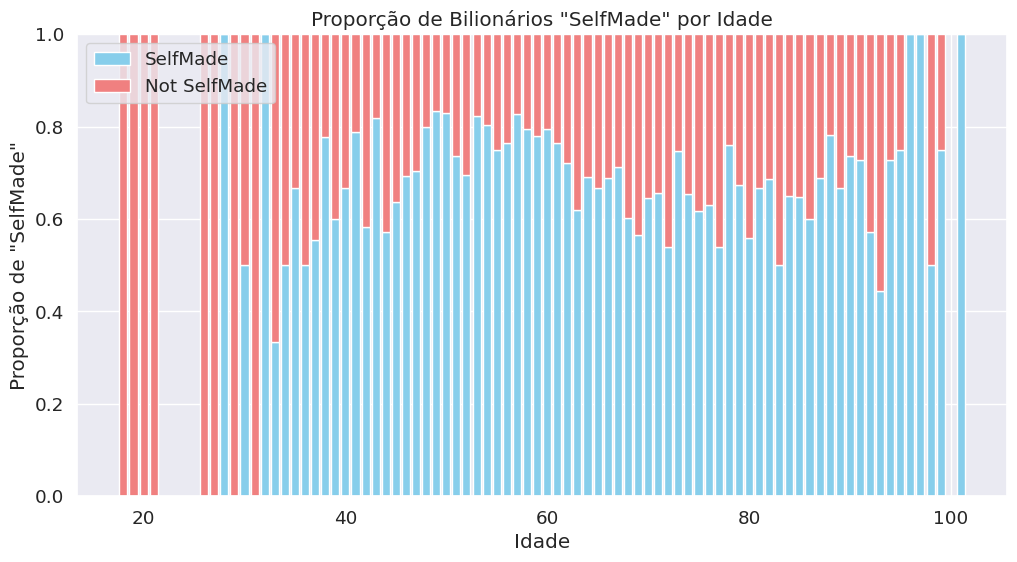

In [69]:
# Agrupe os dados por idade e calcule a proporção de SelfMade
age_selfmade_ratio = dataset.groupby('age')['selfMade'].mean().reset_index()

# Adicione a coluna "NotSelfMade" para completar a contagem
age_selfmade_ratio['NotSelfMade'] = 1 - age_selfmade_ratio['selfMade']

# Plote o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
plt.bar(age_selfmade_ratio['age'], age_selfmade_ratio['selfMade'], color='skyblue', label='SelfMade')
plt.bar(age_selfmade_ratio['age'], age_selfmade_ratio['NotSelfMade'], color='lightcoral', bottom=age_selfmade_ratio['selfMade'], label='Not SelfMade')
plt.title('Proporção de Bilionários "SelfMade" por Idade')
plt.xlabel('Idade')
plt.ylabel('Proporção de "SelfMade"')
plt.legend()
plt.show()

**iv. Indústria de Tecnologia:** <br/>

Hipótese: A indústria de tecnologia é a mais comum entre os bilionários "selfMade". Justificativa: A rápida ascensão de bilionários na indústria de tecnologia sugere que essa área pode ser uma fonte proeminente de fortunas construídas por mérito próprio.<br/>

Resposta: A análise dos dados confirma a hipótese de que a indústria de tecnologia é uma fonte proeminente de fortunas construídas por mérito próprio entre os bilionários. Ao examinarmos a distribuição dos bilionários na indústria de tecnologia, indústria com maior proporção entre os bilionários, observamos que uma proporção significativa deles alcançou seu status por meio de conquistas individuais. Observamos que 92% dos bilionários da indústria de tecnologia alcançou a fortuna por mérito próprios comparativamente a proporção geral de bilionários de todas as indústrias cujo percentual que alcançou fortuna por mérito próprios é de 69% . Essa tendência destaca a importância dessa indústria como catalisador para a geração de riqueza por mérito próprio, respaldando assim a hipótese inicial.


In [70]:
# Substitua 'dataset' pelo nome real do seu DataFrame
fig7 = px.treemap(dataset, path=['industries'], values='finalWorth',
                  title='Distribuição de Riqueza por Indústria',
                  color_discrete_sequence=px.colors.qualitative.Set1)
fig7.update_traces(textinfo="label+percent entry")
fig7.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig7.show()

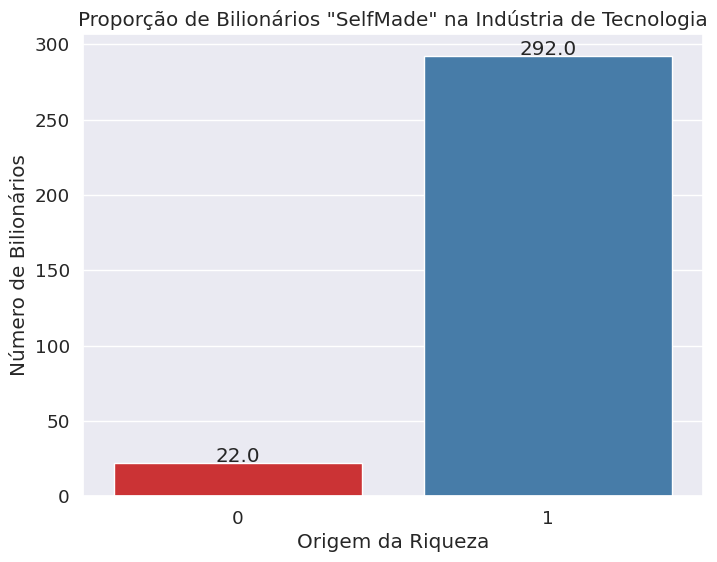

In [71]:
# Filtra o dataset para incluir apenas a indústria de tecnologia
tech_billionaires = dataset[dataset['industries'] == 'Technology']

# Cria um gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='selfMade', data=tech_billionaires, palette='Set1')

# Adiciona valores acima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Proporção de Bilionários "SelfMade" na Indústria de Tecnologia')
plt.xlabel('Origem da Riqueza')
plt.ylabel('Número de Bilionários')
plt.show()

**v. Relação entre Produto Interno Bruto (PIB) e Herança de Riqueza:**

Hipótese: Em países com maior Produto Interno Bruto, a proporção de bilionários que herdou a riqueza é maior. Justificativa: A ideia subjacente é que em economias mais robustas, as oportunidades de herança de riqueza podem ser mais amplas.</br>

Resposta: Observa-se, nos dados disponíveis, que os países com PIB mais elevados não apresentam bilionários "SelfMade" (aqueles que construíram suas fortunas por mérito próprio). Essa visualização confirma a hipótese que em economias mais robustas, há uma maior incidência de indivíduos que alcançaram o status de bilionário por meio de herança. </br>
A análise respalda a ideia de que o mérito próprio desempenha um papel mais significativo na trajetória financeira dos bilionários em economias menos favorecidas. Minha sugestão é procurar e ingerir novas fontes de dados em trabalhos futuros para refazer a análise em uma perspectiva mais robusta para de fato confirmar essa hipótese.

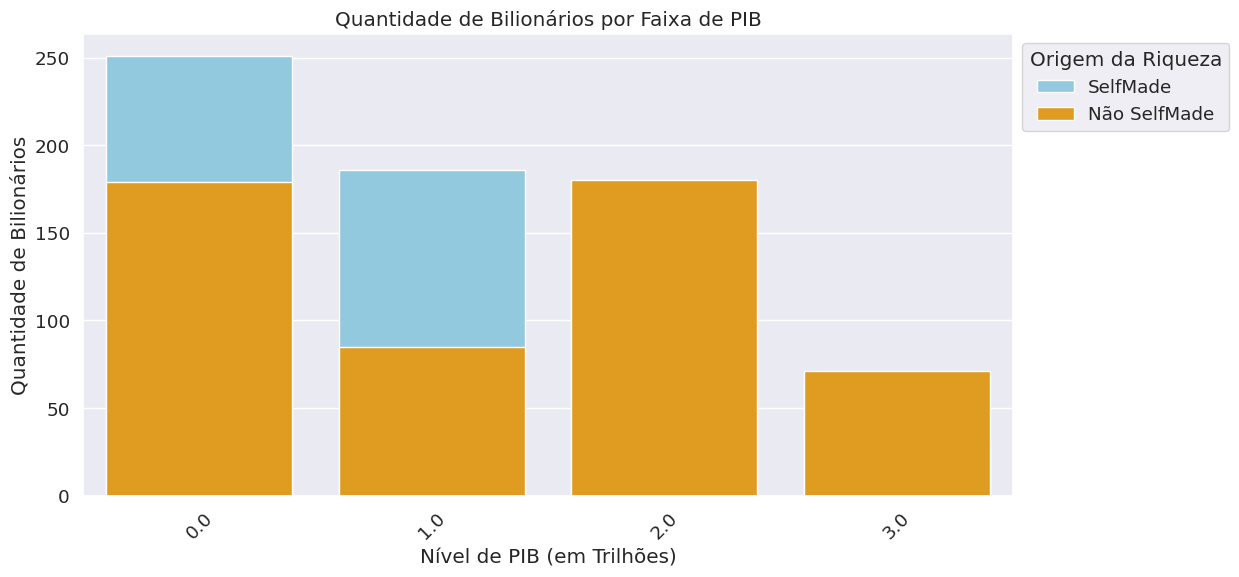

In [72]:
# Converta os valores de GDP para trilhões
dataset['gdpCtry_trillion'] = dataset['gdpCtry'] / 1e12

# Defina os intervalos desejados para a variável gdpCtry_trillion
bins = [0, 1, 2, 3, 4, 5]

# Agrupe os dados por faixas de GDP e conte a quantidade de bilionários em cada faixa
gdp_counts = dataset.groupby(pd.cut(dataset['gdpCtry_trillion'], bins=bins, labels=False, include_lowest=True))['selfMade'].value_counts().unstack().reset_index()

# Plote o gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.barplot(x='gdpCtry_trillion', y=1, data=gdp_counts, color='skyblue', label='SelfMade')
sns.barplot(x='gdpCtry_trillion', y=0, data=gdp_counts, color='orange', label='Não SelfMade')
plt.title('Quantidade de Bilionários por Faixa de PIB')
plt.xlabel('Nível de PIB (em Trilhões)')
plt.ylabel('Quantidade de Bilionários')
plt.xticks(rotation=45)
plt.legend(title='Origem da Riqueza', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 3.3. Matriz de Correlação
A matriz de correlação é uma ferramenta estatística que exibe as correlações entre todas as variáveis em um conjunto de dados. Cada célula na matriz representa o coeficiente de correlação entre duas variáveis.

A próxima etapa envolve a verificação da covariância entre as variáveis numéricas do dataset. A covariância reflete como duas variáveis numéricas estão relacionadas, sendo possível utilizar métricas como o coeficiente de correlação de Pearson para interpretar essas relações. Valores próximos de -1 indicam uma correlação negativa, valores próximos de +1 indicam correlação positiva, e valores próximos de 0 indicam ausência de correlação entre as variáveis.

É relevante observar que essa informação é crucial, especialmente para algoritmos como regressão linear e regressão logística, que podem enfrentar desafios de desempenho quando lidam com atributos altamente correlacionados. Nestes casos devem ser feitos os tratamentos necessários.

Separamos abaixo alguns exemplos de correlação. Optamos na fase de análise exploratória manter esses atributos no projeto. Em tempo de pré-processamento e definição dos modelos de ML podemos rediscutir a necessidade dessas features:

a. Correlação alta entre totalTaxRate e populationCtry, países com população maior arrecadam mais.
b. A Quantidade de habitantes (populationCtry) tem uma correlação negativa alta com a expectativa de vida (lifeExpectCtry) e grau de instrução (tertiaryEnroll), indicando que países mais populosos tendem a ter menor expectativa de vida e menor grau de instrução.
c. Expectativa de vida (lifeExpectCtry) e inflação (cpiCtry) apresentam uma correlação negativa alta, indicando que países com menor expectativa de vida  tendem a ter altos indices de inflação.

**Correlação com a Variável de Saída (selfMade):** Não há correlação específica evidente na matriz para a variável de saída selfMade em relação às outras variáveis. Isso sugere que as características do bilionário não apresentam correlações lineares fortes com a autossuficiência financeira.
É importante destacar que correlação não implica causalidade, e uma compreensão mais profunda das relações entre as variáveis pode depender de outras técnicas estatísticas e de machine learning.

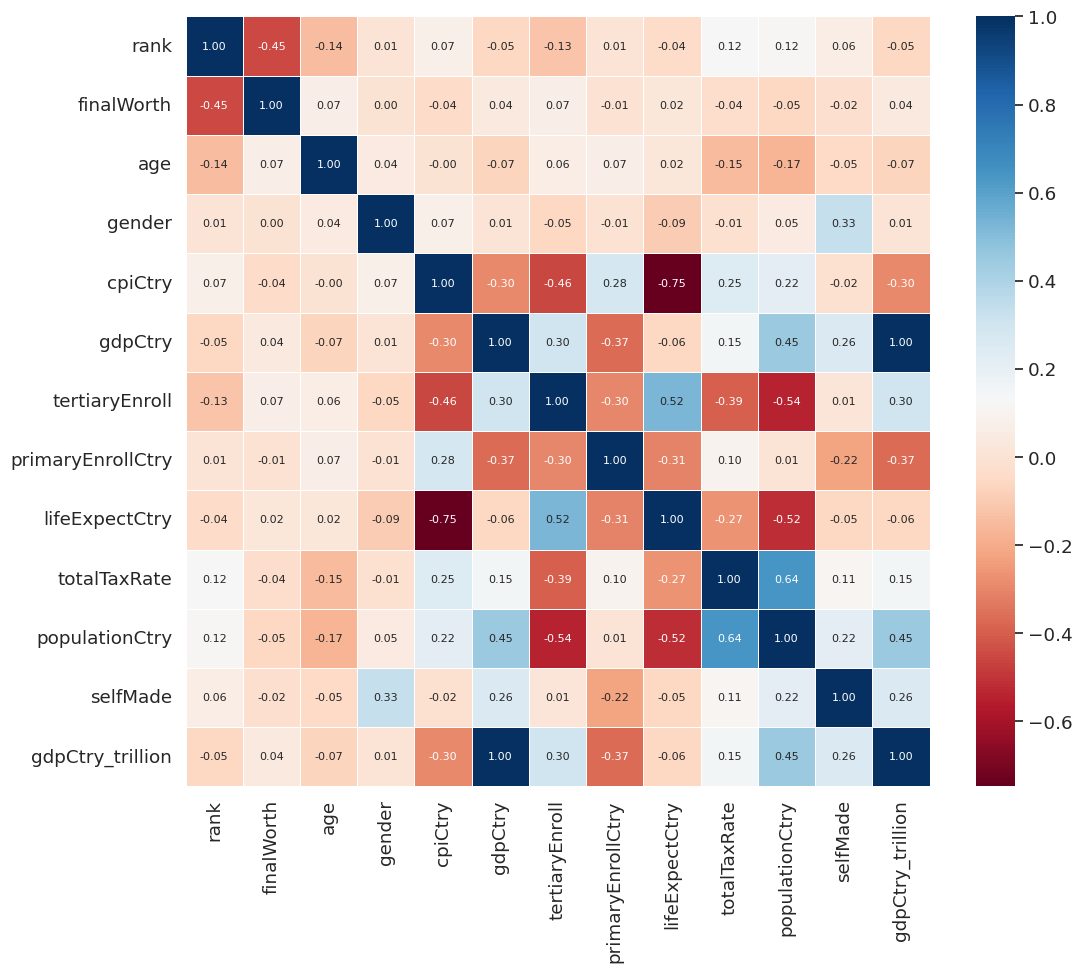

In [73]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', fmt=".2f", linewidths=.5, annot_kws={"size": 8})
plt.show()

O gráfico de dispersão (**scatter plot**) oferece uma visão abrangente das relações entre os diferentes pares de atributos no dataset, destacando agrupamentos e padrões relevantes. Utilizando Seaborn, cada ponto no gráfico representa um bilionário, colorido de acordo com a variável selfMade (laranja para "self-made" e azul para não "self-made"). </br>
Ao explorar as distribuições individuais na diagonal principal, através de histogramas ou gráficos de densidade, é possível identificar padrões distintos entre bilionários "self-made" e não "self-made" em diversos atributos. Por exemplo, observamos um agrupamento notável de bilionários "self-made" com idade acima de 50 anos.</br>

Além disso, os scatter plots fora da diagonal principal revelam relações específicas entre pares de atributos. Países com uma expectativa de vida mais elevada tendem a apresentar uma população menor, enquanto também exibem uma presença mais proeminente de bilionários. Essas visualizações complementam de maneira significativa as análises anteriores, proporcionando insights adicionais sobre a distribuição dos dados.

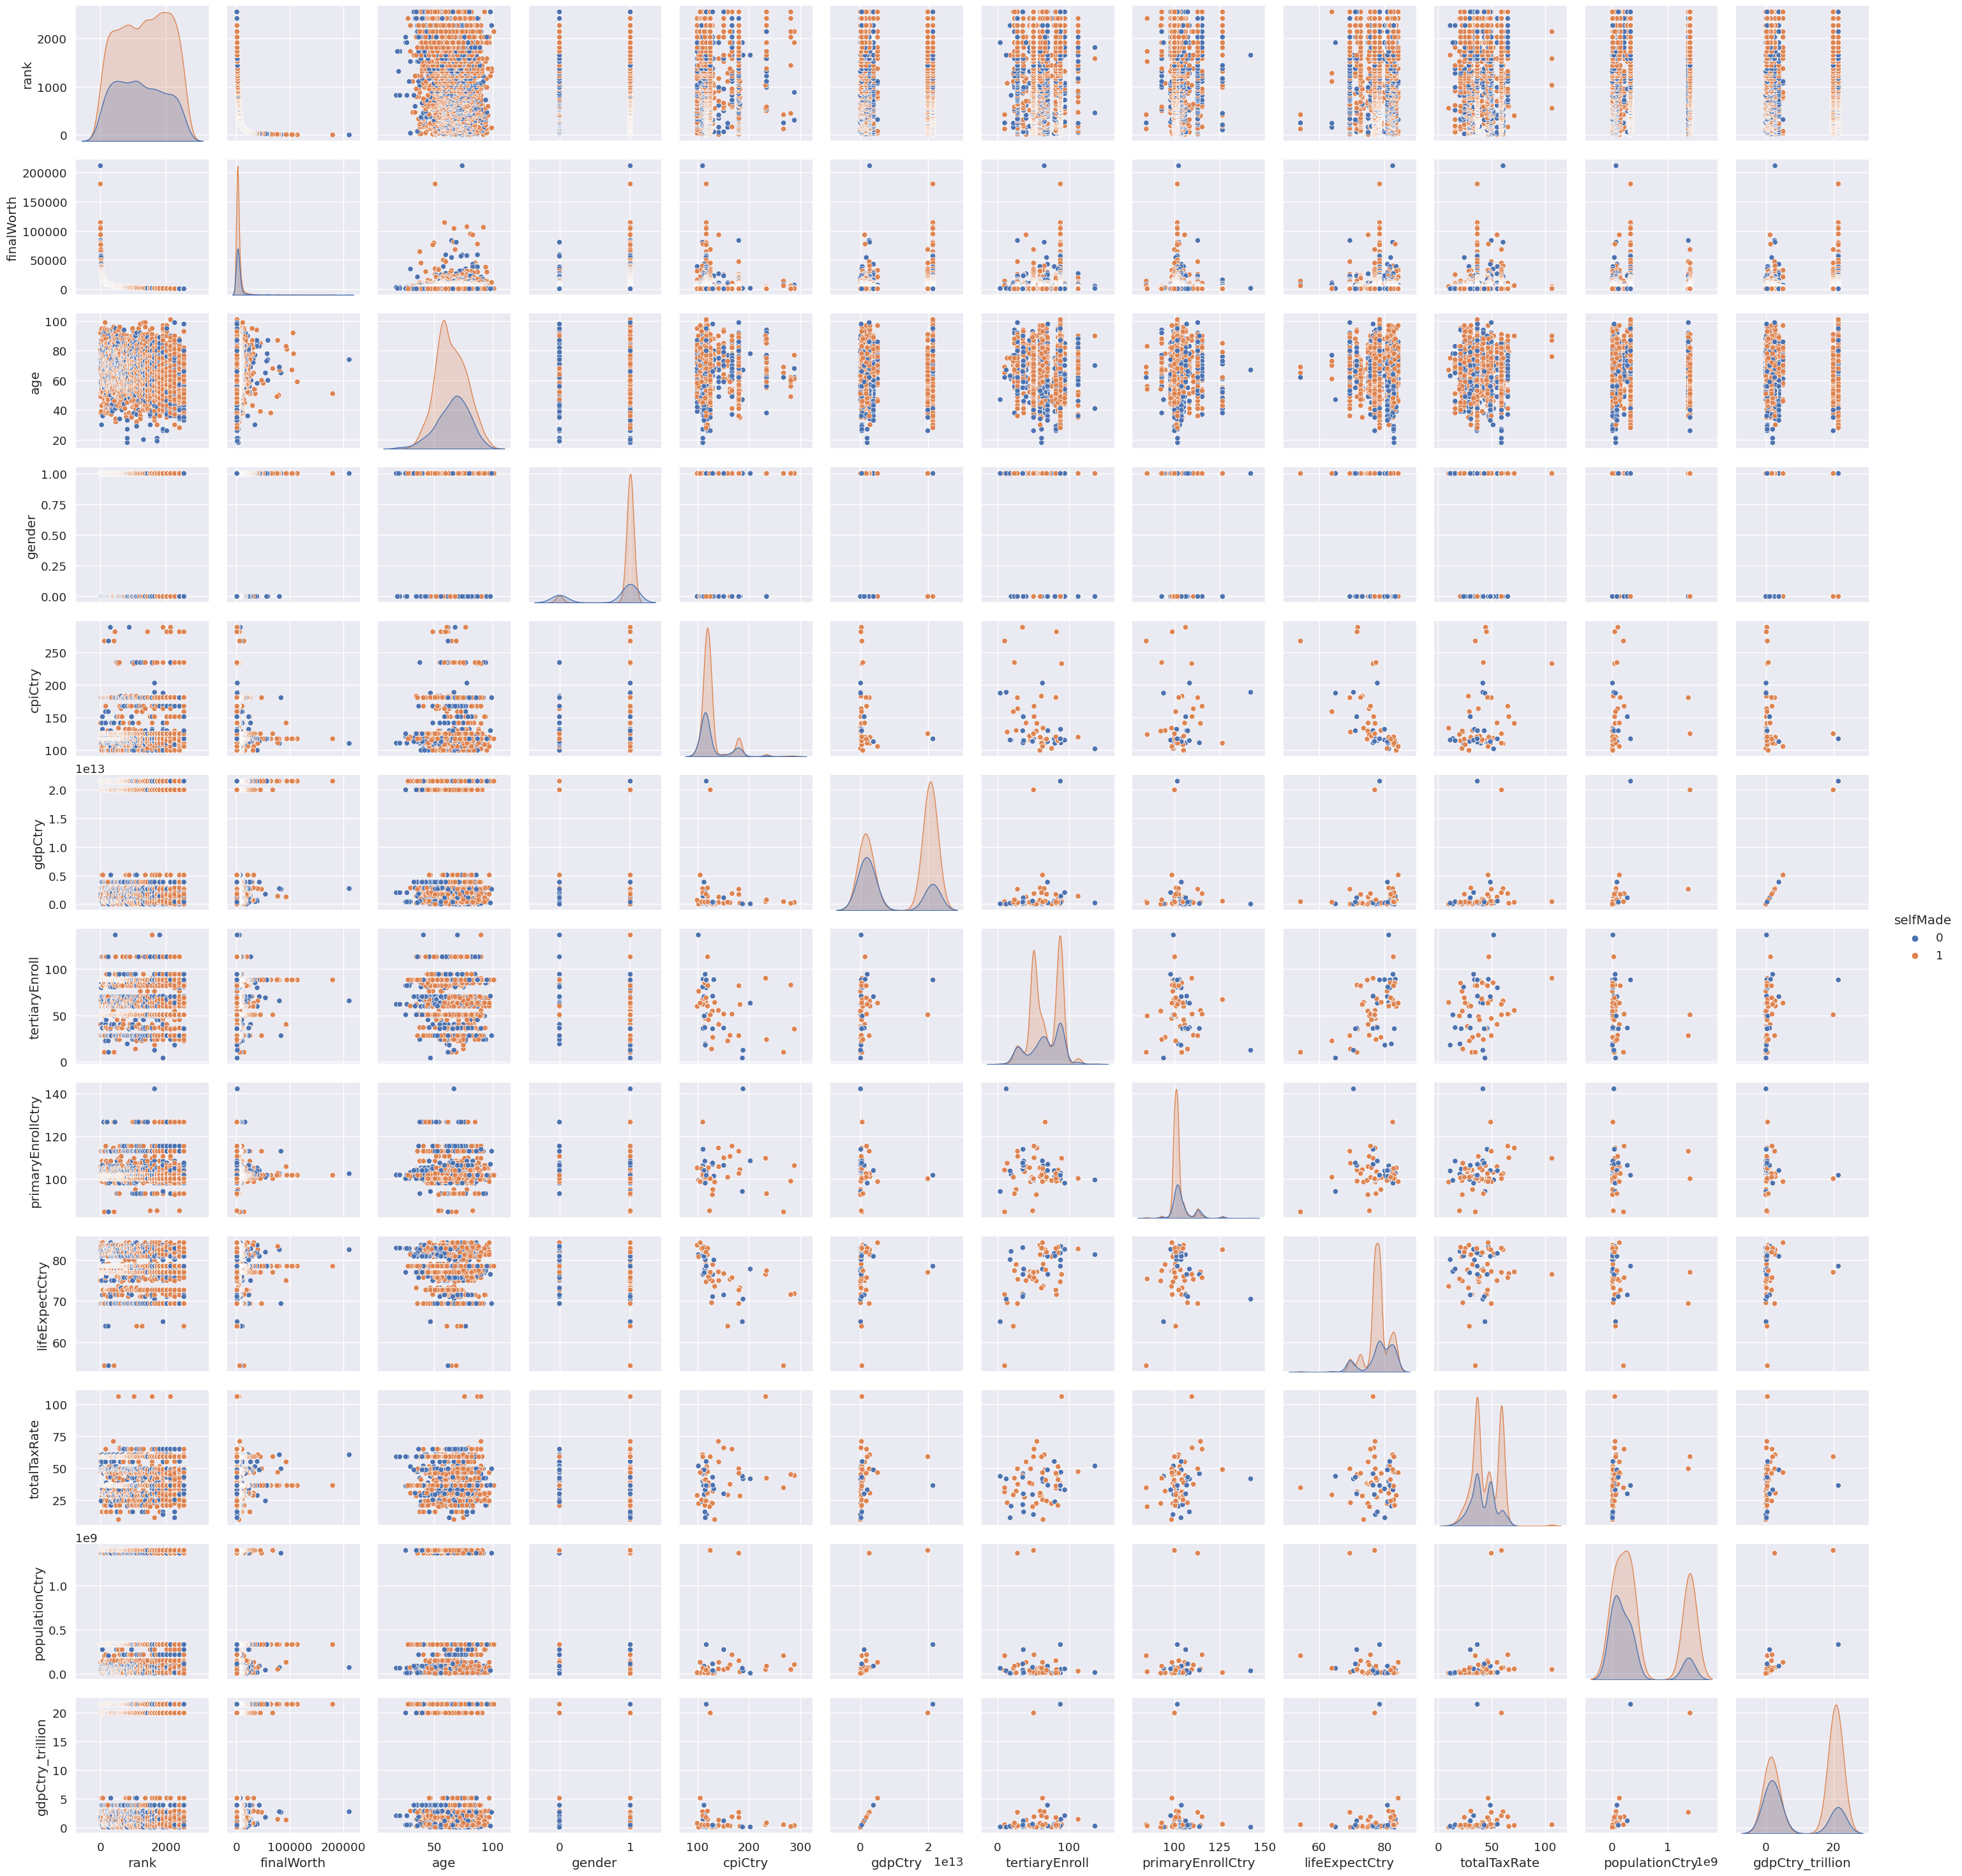

In [74]:
# Define o tamanho da fonte
sns.set(font_scale=1.2)

# Scatter Plot com Seaborn

sns.pairplot(dataset, hue = "selfMade", height = 2.5);

## 4. Pré-Processamento de dados


Nessa fase, conduzimos várias operações essenciais de preparação de dados, abrangendo desde o tratamento de valores faltantes até a limpeza e transformações, como a aplicação de one-hot-encoding. Priorizando uma abordagem cuidadosa, realizamos a separação vital entre os conjuntos de treino e teste antes de explorar estratégias para lidar com o desbalanceamento, utilizando a técnica SMOTE, e aplicar a normalização para evitar possíveis vazamentos de dados. Essas ações são cruciais para assegurar a qualidade e eficácia nas etapas subsequentes.

### 4.1. One-Hot Encoder



O one-hot-encoding é uma técnica comumente empregada para lidar com variáveis categóricas em algoritmos de aprendizado de máquina, especialmente quando se trabalha com modelos que requerem entradas numéricas.

No caso da coluna "industries", que contém diferentes categorias como "Fashion & Retail", "Automotive", "Technology", entre outras, o one-hot-encoder cria colunas binárias para cada categoria única. Cada coluna binária representa a presença ou ausência da categoria correspondente para cada observação no conjunto de dados.

Ao transformar a coluna "industries" usando one-hot-encoding, garantimos que a informação sobre a indústria associada a cada bilionário seja preservada de forma adequada, sem impor uma ordem artificial ou hierarquia entre as categorias. A utilização da biblioteca scikit-learn facilita a aplicação consistente da transformação e evita o risco de vazamento de informações.

In [75]:
# Selecionar os campos desejados para aplicar o One-Hot Encoding
cols_to_encode = ['industries']

# Criar um objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Aplicar o One-Hot Encoding nos campos selecionados
encoded_cols = encoder.fit_transform(dataset[cols_to_encode])

# Criar um DataFrame com as colunas codificadas
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols_to_encode))

# Concatenar o DataFrame original com o DataFrame codificado
dataset_encoded = pd.concat([dataset.drop(cols_to_encode, axis=1), encoded_df], axis=1)

# Reordenar as colunas
new_columns = list(dataset_encoded.columns)
new_columns.remove("selfMade")
new_columns.append("selfMade")
dataset_encoded = dataset_encoded.reindex(columns=new_columns)

dataset_encoded.head(10)

rank  finalWorth   age  gender  cpiCtry       gdpCtry  tertiaryEnroll  \
0     1      211000  74.0       1   110.05  2.715518e+12            65.6   
1     2      180000  51.0       1   117.24  2.142770e+13            88.2   
2     3      114000  59.0       1   117.24  2.142770e+13            88.2   
3     4      107000  78.0       1   117.24  2.142770e+13            88.2   
4     5      106000  92.0       1   117.24  2.142770e+13            88.2   
5     6      104000  67.0       1   117.24  2.142770e+13            88.2   
6     7       94500  81.0       1   117.24  2.142770e+13            88.2   
7     8       93000  83.0       1   141.54  1.258287e+12            40.2   
8     9       83400  65.0       1   180.44  2.611000e+12            28.1   
9    10       80700  67.0       1   117.24  2.142770e+13            88.2   

   primaryEnrollCtry  lifeExpectCtry  totalTaxRate  populationCtry  \
0              102.5            82.5          60.7    6.705989e+07   
1              101.8            78.5          36.6    3.282395e+08   
2              101.8            78.5          36.6    3.282395e+08   
3              101.8            78.5          36.6    3.282395e+08   
4              101.8            78.5          36.6    3.282395e+08   
5              101.8            78.5          36.6    3.282395e+08   
6              101.8            78.5          36.6    3.282395e+08   
7              105.8            75.0          55.1    1.260140e+08   
8              113.0            69.4          49.7    1.366418e+09   
9              101.8            78.5          36.6    3.282395e+08   

   gdpCtry_trillion  industries_Automotive  \
0          2.715518                    0.0   
1         21.427700                    1.0   
2         21.427700                    0.0   
3         21.427700                    0.0   
4         21.427700                    0.0   
5         21.427700                    0.0   
6         21.427700                    0.0   
7          1.258287                    0.0   
8          2.611000                    0.0   
9         21.427700                    0.0   

   industries_Construction & Engineering  industries_Diversified  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   
5                                    0.0                     0.0   
6                                    0.0                     0.0   
7                                    0.0                     0.0   
8                                    0.0                     1.0   
9                                    0.0                     0.0   

   industries_Energy  industries_Fashion & Retail  \
0                0.0                          1.0   
1                0.0                          0.0   
2                0.0                          0.0   
3                0.0                          0.0   
4                0.0                          0.0   
5                0.0                          0.0   
6                0.0                          0.0   
7                0.0                          0.0   
8                0.0                          0.0   
9                0.0                          0.0   

   industries_Finance & Investments  industries_Food & Beverage  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               1.0                         0.0   
5                               0.0                         0.0   
6                               0.0                         0.0   
7                  

In [76]:
# Mostra as dimensões do dataset
print(dataset_encoded.shape)

(2640, 31)


## 4.2 Separação em conjunto de treino e teste

Nesta etapa vamos separar um conjunto de dados para treino e outro para teste. O conjunto de teste será separado para avaliar a precisão do modelo final e fornecer insights sobre o desempenho em dados não observados anteriormente. Na abordagem escolhida, 80% do conjunto de dados serão dedicados à modelagem, enquanto os 20% restantes serão reservados para teste, utilizando a estratégia de divisão de treino e teste. É crucial destacar que as etapas subsequentes de pré-processamento serão executadas exclusivamente no conjunto de dados de treinamento, evitando qualquer vazamento de informação do conjunto de teste para o treino, o que garantirá a integridade do processo.

In [77]:
test_size = 0.20
seed = 3

# Separação em conjuntos de treino e teste (dataset original)
array = dataset_encoded.values
X = array[:,0:30]
y = array[:,30]
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação

# Criando dataframes separado para os conjuntos de treino. Vamos utilizar esse dataset para continuar com as operações de pré-processamento.
dataset_train = pd.DataFrame(data=X_train, columns=dataset_encoded.columns[:30])
dataset_train['selfMade'] = y_train

In [78]:
dataset_train.head()

rank  finalWorth   age  gender  cpiCtry       gdpCtry  tertiaryEnroll  \
0  2405.0      1100.0  70.0     1.0   180.44  2.611000e+12            28.1   
1  1272.0      2400.0  53.0     1.0   125.08  1.991000e+13            50.6   
2  1027.0      2900.0  69.0     1.0   110.96  1.394116e+12            88.9   
3  1217.0      2500.0  74.0     1.0   125.08  1.991000e+13            50.6   
4  2133.0      1300.0  74.0     0.0   105.48  5.081770e+12            63.2   

   primaryEnrollCtry  lifeExpectCtry  totalTaxRate  populationCtry  \
0              113.0            69.4          49.7    1.366418e+09   
1              100.2            77.0          59.2    1.397715e+09   
2              102.7            83.3          47.0    4.707678e+07   
3              100.2            77.0          59.2    1.397715e+09   
4               98.8            84.2          46.7    1.262266e+08   

   gdpCtry_trillion  industries_Automotive  \
0          2.611000                    1.0   
1         19.910000                    0.0   
2          1.394116                    0.0   
3         19.910000                    0.0   
4          5.081770                    0.0   

   industries_Construction & Engineering  industries_Diversified  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   

   industries_Energy  industries_Fashion & Retail  \
0                0.0                          0.0   
1                0.0                          0.0   
2                0.0                          1.0   
3                0.0                          1.0   
4                0.0                          0.0   

   industries_Finance & Investments  industries_Food & Beverage  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   

   industries_Gambling & Casinos  industries_Healthcare  industries_Logistics  \
0                            0.0                    0.0                   0.0   
1                            0.0                    0.0                   0.0   
2                            0.0                    0.0                   0.0   
3                            0.0                    0.0                   0.0   
4                            0.0                    0.0                   0.0   

   industries_Manufacturing  industries_Media & Entertainment  \
0                       0.0                               0.0   
1                       1.0                               0.0   
2                       0.0                               0.0   
3                       0.0                               0.0   
4                       0.0                               1.0   

   industries_Metals & Mining  industries_Real Estate  industries_Service  \
0                         0.0                     0.0                 0.0   
1                         0.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     0.0                 0.0   
4                         0.0                     0.0                 0.0   

   industries_Sports  industries_Technology  industries_Telecom  selfMade  
0                0.0                    0.0                 0.0       0.0  
1                0.0                    0.0                 0.0       1.0  
2                0.0                    0.0                 0.0       1.0  
3                0.0                    0.0                 0.

### 4.3. Tratamento de Missings e Limpeza

Vamos realizar todos os tratamentos no conjunto de treino para evitar vazamento de dados para o conjunto de teste. Para essa etapa de limpeza dos dados verificamos a presença de valores nulos em cada coluna do conjunto de dados. Empregamos a função isnull(), que produz uma matriz booleana sinalizando as posições dos valores nulos. Posteriormente, aplicamos a função sum() para contabilizar a quantidade de valores ausentes em cada coluna, gerando uma série que apresenta essa informação para cada atributo no conjunto de dados. As próximas etapas consistirão no tratamento desses valores nulos no conjunto de dados de treino.

In [79]:
# verificando nulls no dataset
dataset_train.isnull().sum()

rank                                       0
finalWorth                                 0
age                                       59
gender                                     0
cpiCtry                                  147
gdpCtry                                  131
tertiaryEnroll                           145
primaryEnrollCtry                        144
lifeExpectCtry                           145
totalTaxRate                             145
populationCtry                           131
gdpCtry_trillion                         131
industries_Automotive                      0
industries_Construction & Engineering      0
industries_Diversified                     0
industries_Energy                          0
industries_Fashion & Retail                0
industries_Finance & Investments           0
industries_Food & Beverage                 0
industries_Gambling & Casinos              0
industries_Healthcare                      0
industries_Logistics                       0
industries

<Axes: >

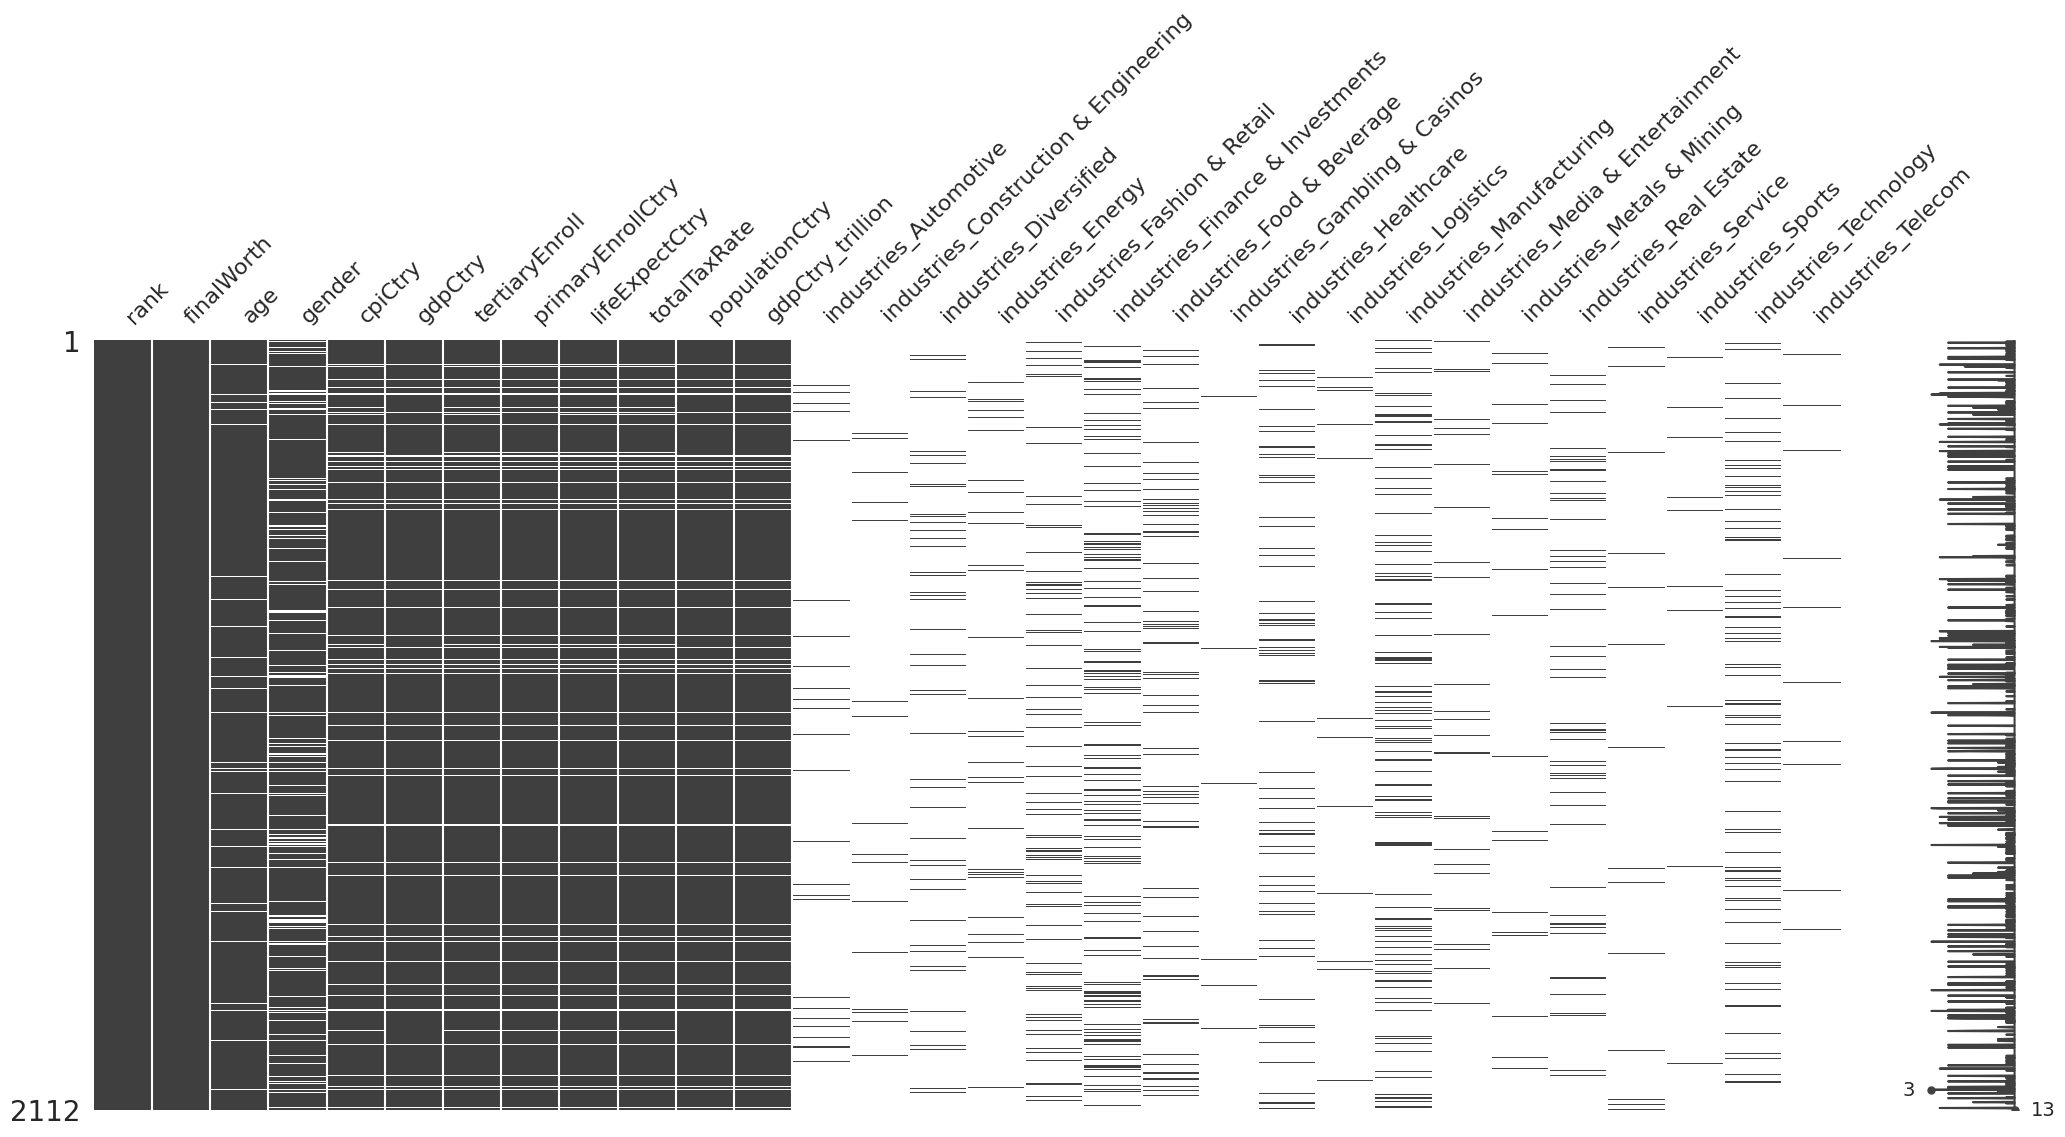

In [80]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset_train.columns)

# o novo dataset irá conter todas as colunas com exceção da última (selfMade)
atributos = dataset_train[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

<Axes: >

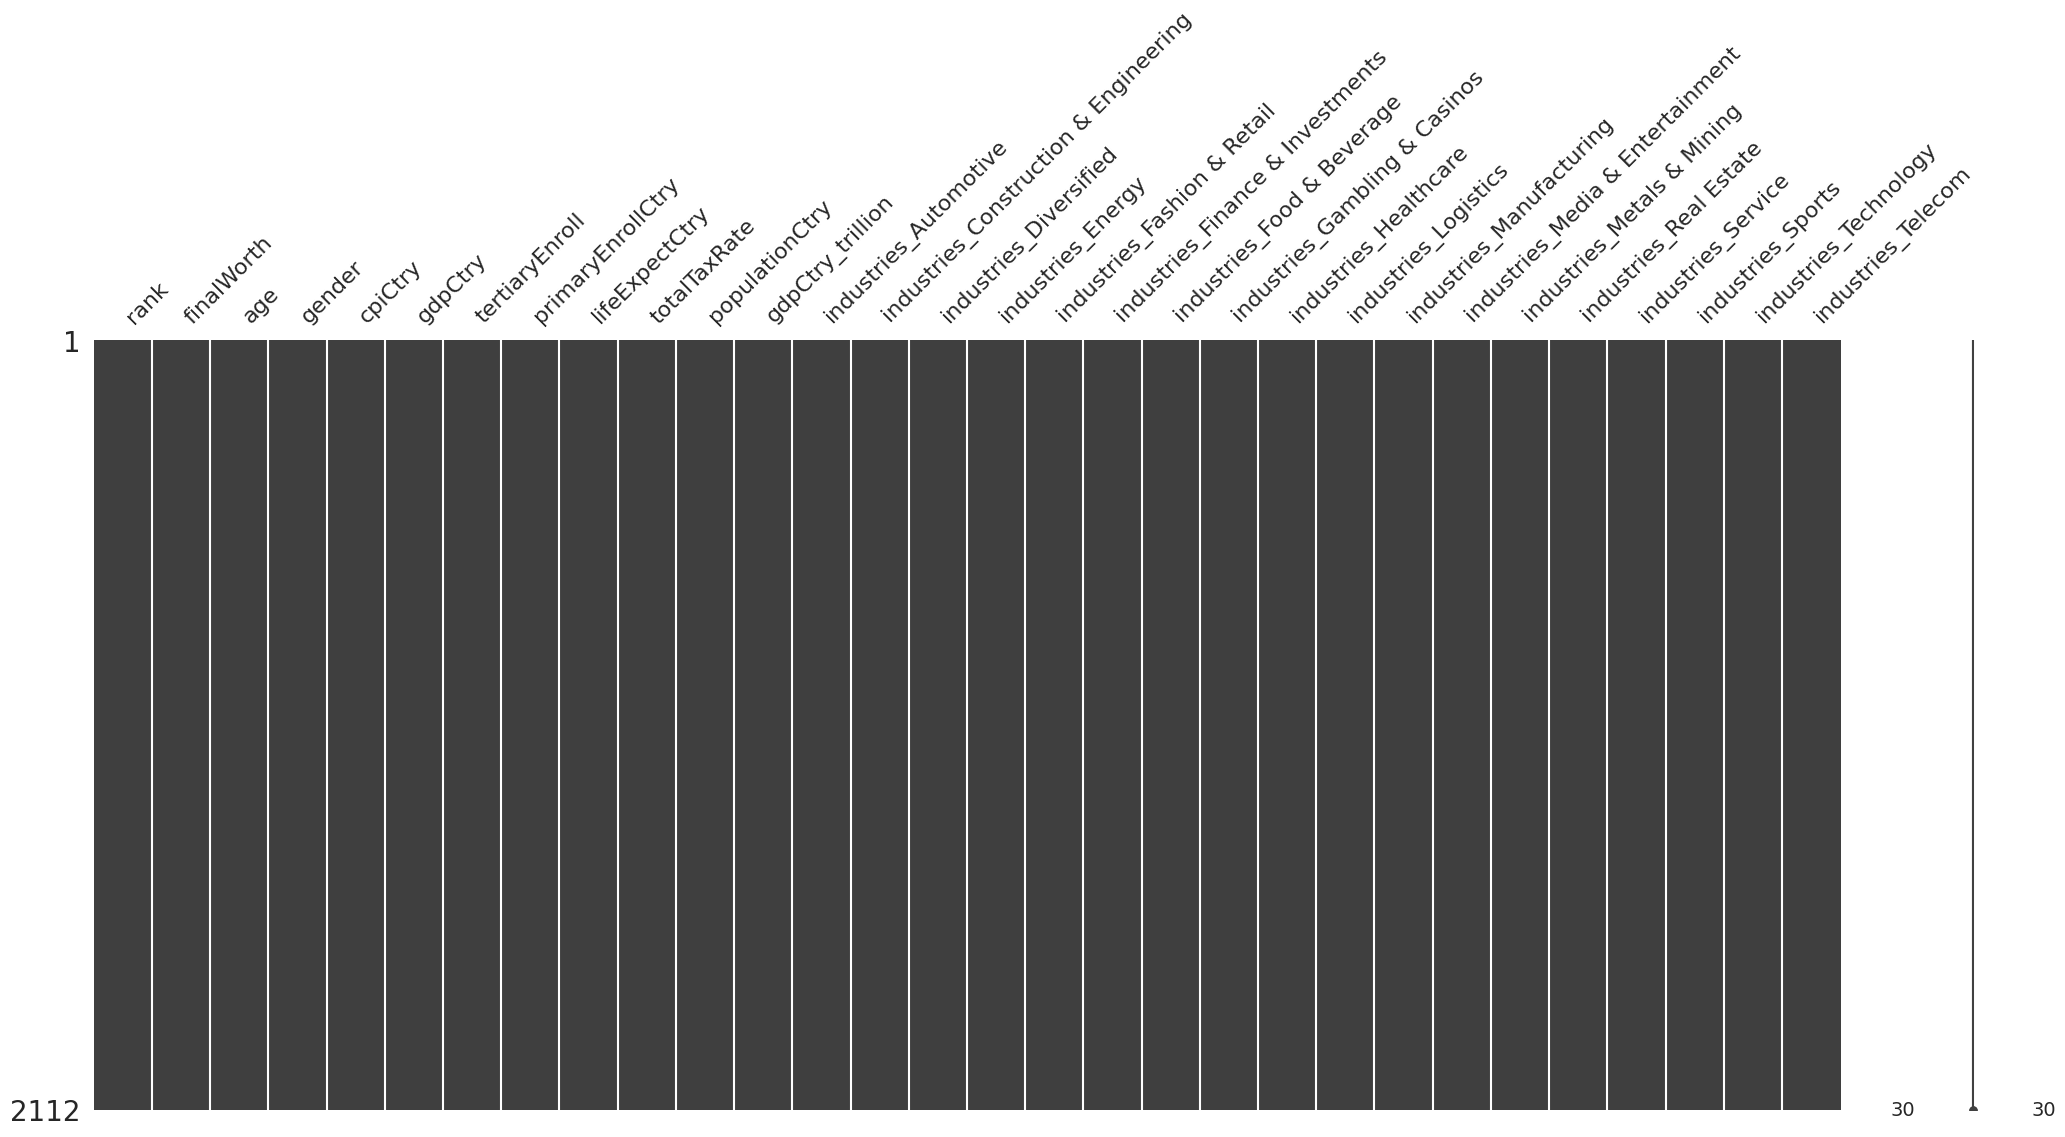

In [81]:
# substituindo o NaN por 0 nos campos onde o "0" faz sentido, como por exemplo os campos gerados no one-hot-encoder.
atributos['gender'].fillna(0, inplace=True)
atributos['industries_Automotive'].fillna(0, inplace=True)
atributos['industries_Construction & Engineering'].fillna(0, inplace=True)
atributos['industries_Diversified'].fillna(0, inplace=True)
atributos['industries_Energy'].fillna(0, inplace=True)
atributos['industries_Fashion & Retail'].fillna(0, inplace=True)
atributos['industries_Finance & Investments'].fillna(0, inplace=True)
atributos['industries_Food & Beverage'].fillna(0, inplace=True)
atributos['industries_Gambling & Casinos'].fillna(0, inplace=True)
atributos['industries_Healthcare'].fillna(0, inplace=True)
atributos['industries_Logistics'].fillna(0, inplace=True)
atributos['industries_Manufacturing'].fillna(0, inplace=True)
atributos['industries_Media & Entertainment'].fillna(0, inplace=True)
atributos['industries_Metals & Mining'].fillna(0, inplace=True)
atributos['industries_Real Estate'].fillna(0, inplace=True)
atributos['industries_Service'].fillna(0, inplace=True)
atributos['industries_Sports'].fillna(0, inplace=True)
atributos['industries_Technology'].fillna(0, inplace=True)
atributos['industries_Telecom'].fillna(0, inplace=True)

# substituindo os NaN de 'age', 'cpiCtry', 'gpdCtry', 'gpdCtry_trillion', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'totalTaxRate', 'populationCtry' pela mediana da coluna
atributos['age'].fillna(atributos['age'].median(), inplace=True)
atributos['cpiCtry'].fillna(atributos['cpiCtry'].median(), inplace=True)
atributos['gdpCtry'].fillna(atributos['gdpCtry'].median(), inplace=True)
atributos['gdpCtry_trillion'].fillna(atributos['gdpCtry_trillion'].median(), inplace=True)
atributos['primaryEnrollCtry'].fillna(atributos['primaryEnrollCtry'].median(), inplace=True)
atributos['tertiaryEnroll'].fillna(atributos['tertiaryEnroll'].median(), inplace=True)
atributos['lifeExpectCtry'].fillna(atributos['lifeExpectCtry'].median(), inplace=True)
atributos['totalTaxRate'].fillna(atributos['totalTaxRate'].median(), inplace=True)
atributos['populationCtry'].fillna(atributos['populationCtry'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [82]:
# verificando nulls no dataset
atributos.isnull().sum()

rank                                     0
finalWorth                               0
age                                      0
gender                                   0
cpiCtry                                  0
gdpCtry                                  0
tertiaryEnroll                           0
primaryEnrollCtry                        0
lifeExpectCtry                           0
totalTaxRate                             0
populationCtry                           0
gdpCtry_trillion                         0
industries_Automotive                    0
industries_Construction & Engineering    0
industries_Diversified                   0
industries_Energy                        0
industries_Fashion & Retail              0
industries_Finance & Investments         0
industries_Food & Beverage               0
industries_Gambling & Casinos            0
industries_Healthcare                    0
industries_Logistics                     0
industries_Manufacturing                 0
industries_

Com o intuito de evitar qualquer vazamento de dados do conjunto de treinamento para o conjunto de teste, optamos por realizar o tratamento de valores ausentes de maneira distinta para o **conjunto de teste**, garantindo assim a integridade e independência dos dados em ambas as fases do processo.

<Axes: >

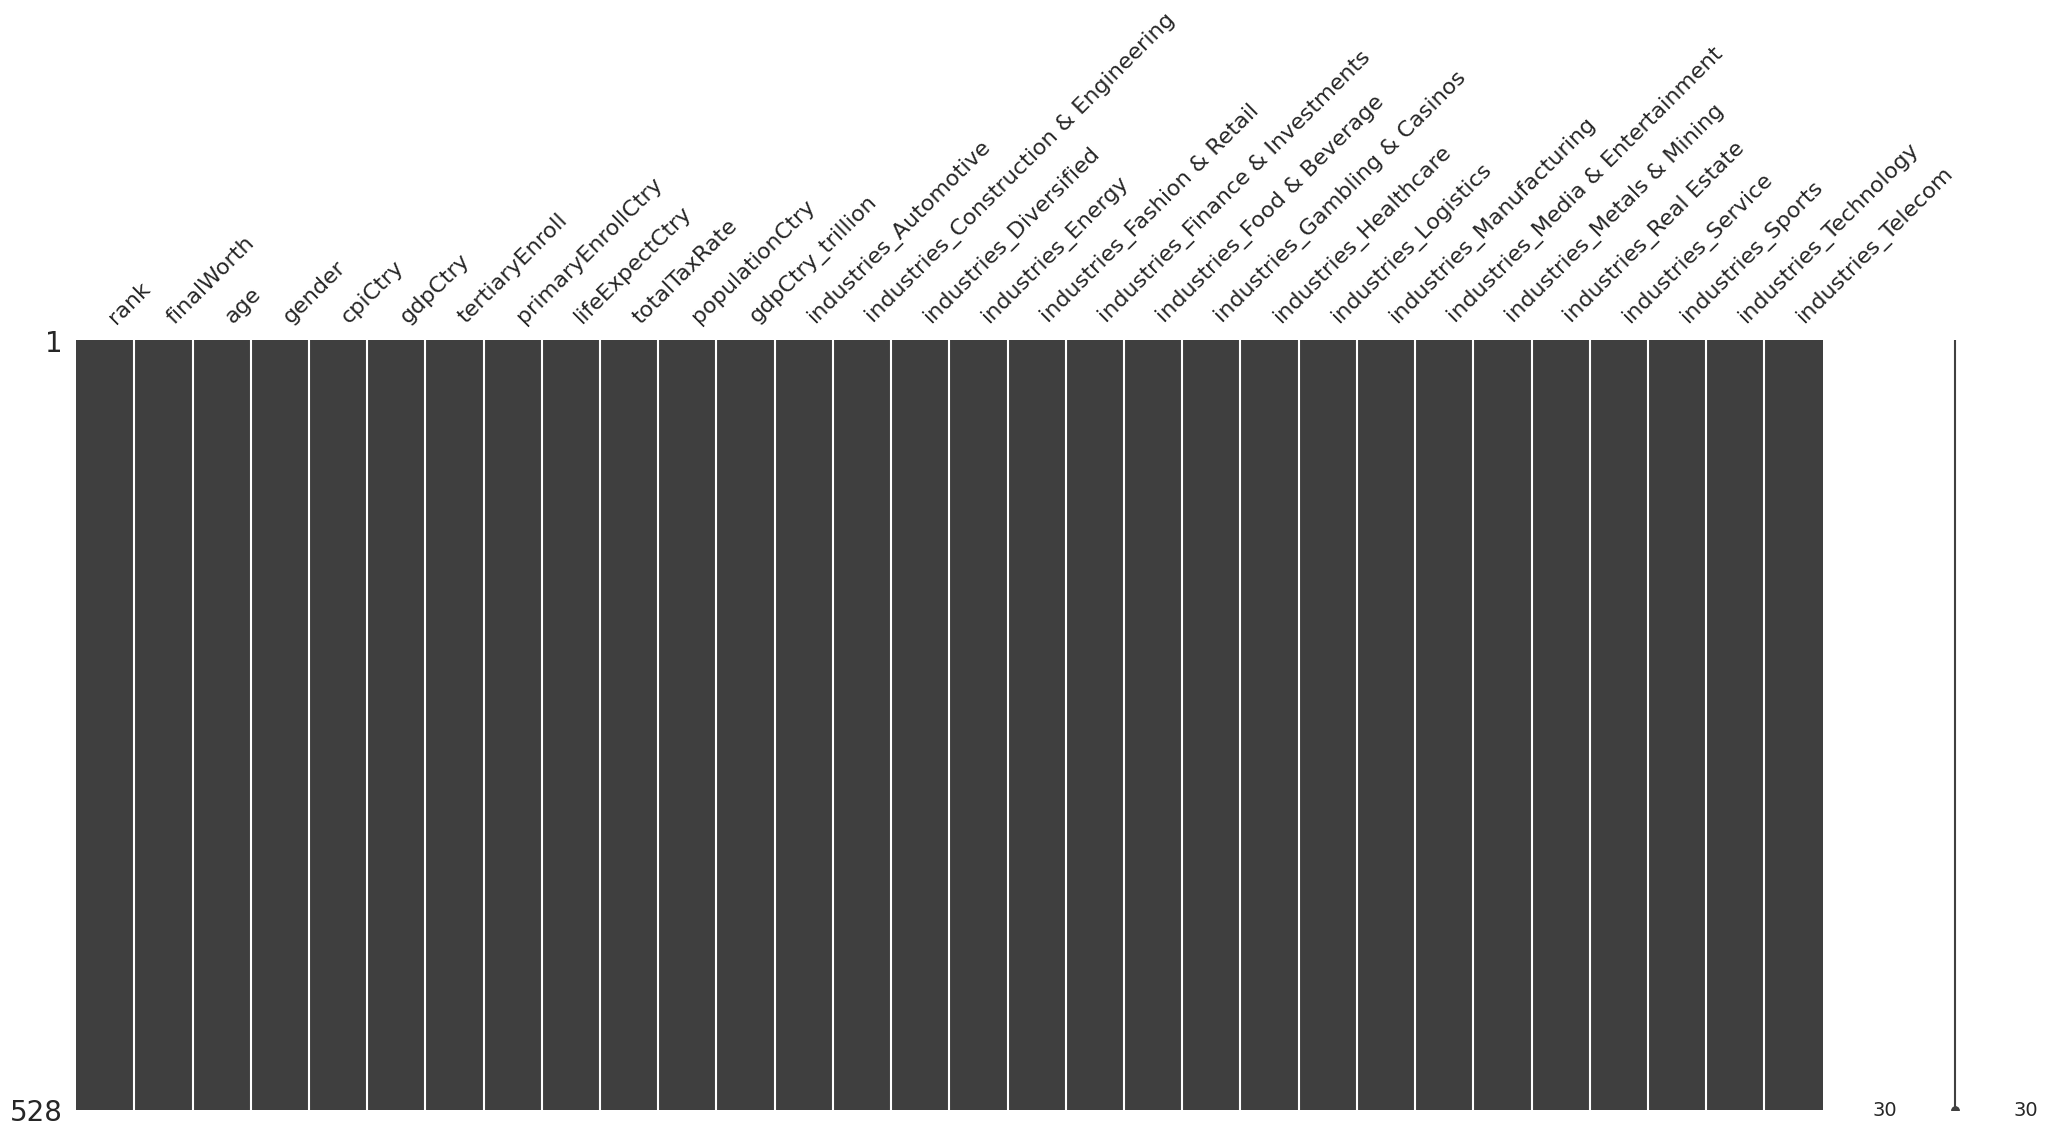

In [83]:
# Separando o conjunto de teste
dataset_test = pd.DataFrame(data=X_test, columns=dataset_encoded.columns[:30])
dataset_test['selfMade'] = y_test

# Substituindo os zeros por NaN
atributos_test = dataset_test.iloc[:, :-1].replace(0, np.nan)

# Substituindo o NaN por 0 nos campos onde o "0" faz sentido
atributos_test['gender'].fillna(0, inplace=True)
atributos_test['industries_Automotive'].fillna(0, inplace=True)
atributos_test['industries_Construction & Engineering'].fillna(0, inplace=True)
atributos_test['industries_Diversified'].fillna(0, inplace=True)
atributos_test['industries_Energy'].fillna(0, inplace=True)
atributos_test['industries_Fashion & Retail'].fillna(0, inplace=True)
atributos_test['industries_Finance & Investments'].fillna(0, inplace=True)
atributos_test['industries_Food & Beverage'].fillna(0, inplace=True)
atributos_test['industries_Gambling & Casinos'].fillna(0, inplace=True)
atributos_test['industries_Healthcare'].fillna(0, inplace=True)
atributos_test['industries_Logistics'].fillna(0, inplace=True)
atributos_test['industries_Manufacturing'].fillna(0, inplace=True)
atributos_test['industries_Media & Entertainment'].fillna(0, inplace=True)
atributos_test['industries_Metals & Mining'].fillna(0, inplace=True)
atributos_test['industries_Real Estate'].fillna(0, inplace=True)
atributos_test['industries_Service'].fillna(0, inplace=True)
atributos_test['industries_Sports'].fillna(0, inplace=True)
atributos_test['industries_Technology'].fillna(0, inplace=True)
atributos_test['industries_Telecom'].fillna(0, inplace=True)


# Substituindo os NaN de 'age', 'cpiCtry', 'gpdCtry', 'gpdCtry_trillion', 'tertiaryEnroll', 'primaryEnrollCtry', 'lifeExpectCtry', 'totalTaxRate', 'populationCtry' pela mediana da coluna
atributos_test['age'].fillna(atributos_test['age'].median(), inplace=True)
atributos_test['cpiCtry'].fillna(atributos_test['cpiCtry'].median(), inplace=True)
atributos_test['gdpCtry'].fillna(atributos_test['gdpCtry'].median(), inplace=True)
atributos_test['gdpCtry_trillion'].fillna(atributos_test['gdpCtry_trillion'].median(), inplace=True)
atributos_test['primaryEnrollCtry'].fillna(atributos_test['primaryEnrollCtry'].median(), inplace=True)
atributos_test['tertiaryEnroll'].fillna(atributos_test['tertiaryEnroll'].median(), inplace=True)
atributos_test['lifeExpectCtry'].fillna(atributos_test['lifeExpectCtry'].median(), inplace=True)
atributos_test['totalTaxRate'].fillna(atributos_test['totalTaxRate'].median(), inplace=True)
atributos_test['populationCtry'].fillna(atributos_test['populationCtry'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos_test)

In [84]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'selfMade' no novo dataset
datasetSemMissings['selfMade'] = dataset_train['selfMade']

# exibindo as primeiras linhas
datasetSemMissings.head()

rank  finalWorth   age  gender  cpiCtry       gdpCtry  tertiaryEnroll  \
0  2405.0      1100.0  70.0     1.0   180.44  2.611000e+12            28.1   
1  1272.0      2400.0  53.0     1.0   125.08  1.991000e+13            50.6   
2  1027.0      2900.0  69.0     1.0   110.96  1.394116e+12            88.9   
3  1217.0      2500.0  74.0     1.0   125.08  1.991000e+13            50.6   
4  2133.0      1300.0  74.0     0.0   105.48  5.081770e+12            63.2   

   primaryEnrollCtry  lifeExpectCtry  totalTaxRate  populationCtry  \
0              113.0            69.4          49.7    1.366418e+09   
1              100.2            77.0          59.2    1.397715e+09   
2              102.7            83.3          47.0    4.707678e+07   
3              100.2            77.0          59.2    1.397715e+09   
4               98.8            84.2          46.7    1.262266e+08   

   gdpCtry_trillion  industries_Automotive  \
0          2.611000                    1.0   
1         19.910000                    0.0   
2          1.394116                    0.0   
3         19.910000                    0.0   
4          5.081770                    0.0   

   industries_Construction & Engineering  industries_Diversified  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   

   industries_Energy  industries_Fashion & Retail  \
0                0.0                          0.0   
1                0.0                          0.0   
2                0.0                          1.0   
3                0.0                          1.0   
4                0.0                          0.0   

   industries_Finance & Investments  industries_Food & Beverage  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   

   industries_Gambling & Casinos  industries_Healthcare  industries_Logistics  \
0                            0.0                    0.0                   0.0   
1                            0.0                    0.0                   0.0   
2                            0.0                    0.0                   0.0   
3                            0.0                    0.0                   0.0   
4                            0.0                    0.0                   0.0   

   industries_Manufacturing  industries_Media & Entertainment  \
0                       0.0                               0.0   
1                       1.0                               0.0   
2                       0.0                               0.0   
3                       0.0                               0.0   
4                       0.0                               1.0   

   industries_Metals & Mining  industries_Real Estate  industries_Service  \
0                         0.0                     0.0                 0.0   
1                         0.0                     0.0                 0.0   
2                         0.0                     0.0                 0.0   
3                         0.0                     0.0                 0.0   
4                         0.0                     0.0                 0.0   

   industries_Sports  industries_Technology  industries_Telecom  selfMade  
0                0.0                    0.0                 0.0       0.0  
1                0.0                    0.0                 0.0       1.0  
2                0.0                    0.0                 0.0       1.0  
3                0.0                    0.0                 0.

In [85]:
# Mostra as dimensões do dataset
print(datasetSemMissings.shape)

(2112, 31)


## 4.4 Tratamento do desbalanceamento

Utilizei a técnica SMOTE (Synthetic Minority Over-sampling Technique) para lidar com o desbalanceamento das classes no conjunto de treino. O SMOTE é uma abordagem de oversampling que cria amostras sintéticas da classe minoritária, aumentando sua representação para equilibrar com a classe majoritária.

In [86]:
# Converte em array para aplicar o balanceamento.
array = datasetSemMissings.values
X_train_SemMissings = array[:, 0:30]
y_train_SemMissings = array[:, 30]

# Balanceamento com a técnica SMOTE
sm = SMOTE(sampling_strategy="minority", random_state=37)
x_train_smote, y_train_smote = sm.fit_resample(X_train_SemMissings, y_train_SemMissings)

# Criar DataFrame com os conjuntos de treino balanceados
df_train_smote = pd.DataFrame(x_train_smote)
df_train_smote['selfMade'] = y_train_smote  # Adiciona a coluna de destino
# Nova distribuição das classes
class_distribution = df_train_smote.groupby('selfMade').size()
print(class_distribution)

selfMade
0.0    1450
1.0    1450
dtype: int64


In [87]:
df_train_smote.head()

0       1     2    3       4             5     6      7     8     9  \
0  2405.0  1100.0  70.0  1.0  180.44  2.611000e+12  28.1  113.0  69.4  49.7   
1  1272.0  2400.0  53.0  1.0  125.08  1.991000e+13  50.6  100.2  77.0  59.2   
2  1027.0  2900.0  69.0  1.0  110.96  1.394116e+12  88.9  102.7  83.3  47.0   
3  1217.0  2500.0  74.0  1.0  125.08  1.991000e+13  50.6  100.2  77.0  59.2   
4  2133.0  1300.0  74.0  0.0  105.48  5.081770e+12  63.2   98.8  84.2  46.7   

             10         11   12   13   14   15   16   17   18   19   20   21  \
0  1.366418e+09   2.611000  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.397715e+09  19.910000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  4.707678e+07   1.394116  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3  1.397715e+09  19.910000  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
4  1.262266e+08   5.081770  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    22   23   24   25   26   27   28   29  selfMade  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       0.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0       1.0

## 4.5 Normalização dos Dados

A normalização dos dados é um passo crucial em muitos processos de pré-processamento de dados, especialmente quando diferentes características possuem escalas distintas ou quando se faz uso de algoritmos sensíveis à escala dos dados. No caso específico desse trabalho, a normalização foi aplicada usando o Min-Max Scaler, um transformador que ajusta os dados para um intervalo específico, geralmente entre 0 e 1.

Ao analisar o código fornecido, a normalização foi realizada nos conjuntos de treinamento e teste. Isso é fundamental quando se utiliza um conjunto de treinamento balanceado, gerado pela técnica SMOTE, e se pretende aplicar um modelo de aprendizado de máquina. A normalização garante que todas as características tenham a mesma escala, evitando que algumas delas dominem sobre as outras durante o processo de treinamento, o que poderia levar a um viés no desempenho do modelo.

Portanto, ao normalizar os dados, você está contribuindo para a estabilidade e eficácia do treinamento do modelo, permitindo que ele aprenda de maneira equilibrada a partir das diferentes características presentes nos conjuntos de dados de treinamento e teste normalizados.

In [88]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# Ajustar o normalizador usando apenas os dados de treinamento
scaler.fit(x_train_smote)

# Aplicar a normalização aos dados de treinamento
X_train_normalized = scaler.transform(x_train_smote)
#X_test_normalized = scaler.transform(X_test)

# Obter os nomes das colunas originais
colunas_originais = datasetSemMissings.columns

# Criar DataFrame com os conjuntos de treino balanceados
df_scaled = pd.DataFrame(X_train_normalized, columns=colunas_originais[0:30])
#Mantendo o valor original do target
df_scaled['selfMade'] = y_train_smote

df_scaled.head(10)

rank  finalWorth       age  gender   cpiCtry   gdpCtry  tertiaryEnroll  \
0  0.946809    0.000559  0.626506     1.0  0.427944  0.121722        0.181750   
1  0.500394    0.007821  0.421687     1.0  0.135065  0.929161        0.351433   
2  0.403861    0.010615  0.614458     1.0  0.060364  0.064924        0.640271   
3  0.478723    0.008380  0.674699     1.0  0.135065  0.929161        0.351433   
4  0.839638    0.001676  0.674699     0.0  0.031372  0.237047        0.446456   
5  0.023641    0.126816  0.530120     1.0  0.429584  0.079195        0.587481   
6  0.301024    0.015084  0.602410     1.0  0.106179  0.131810        0.422323   
7  0.434200    0.009497  0.481928     1.0  0.093588  0.929161        0.464555   
8  0.049645    0.072067  0.469880     1.0  0.135065  0.929161        0.351433   
9  0.795114    0.002235  0.361446     1.0  0.093588  1.000000        0.634992   

   primaryEnrollCtry  lifeExpectCtry  totalTaxRate  populationCtry  \
0           0.493031        0.505017      0.412863        0.977608   
1           0.270035        0.759197      0.511411        1.000000   
2           0.313589        0.969900      0.384855        0.033655   
3           0.270035        0.759197      0.511411        1.000000   
4           0.245645        1.000000      0.381743        0.090284   
5           0.311847        0.615385      0.376556        0.103268   
6           0.287456        0.903010      0.214730        0.047791   
7           0.297909        0.809365      0.336100        0.234819   
8           0.270035        0.759197      0.511411        1.000000   
9           0.297909        0.809365      0.276971        0.234819   

   gdpCtry_trillion  industries_Automotive  \
0          0.121722                    1.0   
1          0.929161                    0.0   
2          0.064924                    0.0   
3          0.929161                    0.0   
4          0.237047                    0.0   
5          0.079195                    0.0   
6          0.131810                    0.0   
7          0.929161                    0.0   
8          0.929161                    0.0   
9          1.000000                    0.0   

   industries_Construction & Engineering  industries_Diversified  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   
5                                    0.0                     0.0   
6                                    0.0                     0.0   
7                                    0.0                     0.0   
8                                    0.0                     0.0   
9                                    0.0                     0.0   

   industries_Energy  industries_Fashion & Retail  \
0                0.0                          0.0   
1                0.0                          0.0   
2                0.0                          1.0   
3                0.0                          1.0   
4                0.0                          0.0   
5                0.0                          0.0   
6                0.0                          1.0   
7                0.0                          0.0   
8                0.0                          0.0   
9                0.0                          0.0   

   industries_Finance & Investments  industries_Food & Beverage  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
5                               0.0                         0.0   
6                               0.0

In [89]:
df_scaled.tail(10)

rank  finalWorth       age    gender   cpiCtry   gdpCtry  \
2890  0.643958    0.012093  0.544604  0.262631  0.093588  1.000000   
2891  0.478723    0.008380  0.817076  1.000000  0.093588  1.000000   
2892  0.619779    0.005028  0.566265  1.000000  0.072585  0.025228   
2893  0.365813    0.013016  0.660593  1.000000  0.427944  0.121722   
2894  0.727062    0.003985  0.634739  0.258333  0.093588  0.929161   
2895  0.992498    0.000095  0.671102  1.000000  0.082584  0.094557   
2896  0.138772    0.034818  0.649005  1.000000  0.093588  1.000000   
2897  0.798615    0.003380  0.539311  1.000000  0.093588  0.929161   
2898  0.128220    0.033903  0.545069  0.228910  0.427944  0.121722   
2899  0.146518    0.031208  0.528878  1.000000  0.057137  0.016099   

      tertiaryEnroll  primaryEnrollCtry  lifeExpectCtry  totalTaxRate  \
2890        0.634992           0.297909        0.809365      0.276971   
2891        0.634992           0.297909        0.809365      0.276971   
2892        0.341629           0.263066        0.755853      0.203320   
2893        0.181750           0.493031        0.505017      0.412863   
2894        0.464555           0.297909        0.809365      0.336100   
2895        0.680995           0.233449        0.946488      0.241701   
2896        0.634992           0.297909        0.809365      0.276971   
2897        0.464555           0.297909        0.809365      0.336100   
2898        0.181750           0.493031        0.505017      0.412863   
2899        0.577677           0.289199        0.892977      0.144191   

      populationCtry  gdpCtry_trillion  industries_Automotive  \
2890        0.234819          1.000000                    0.0   
2891        0.234819          1.000000                    0.0   
2892        0.049788          0.025228                    0.0   
2893        0.977608          0.121722                    0.0   
2894        0.234819          0.929161                    0.0   
2895        0.036969          0.094557                    0.0   
2896        0.234819          1.000000                    0.0   
2897        0.234819          0.929161                    0.0   
2898        0.977608          0.121722                    0.0   
2899        0.004136          0.016099                    0.0   

      industries_Construction & Engineering  industries_Diversified  \
2890                                    0.0                 0.00000   
2891                                    0.0                 0.00000   
2892                                    0.0                 1.00000   
2893                                    0.0                 0.00000   
2894                                    0.0                 0.00000   
2895                                    0.0                 0.00000   
2896                                    0.0                 0.00000   
2897                                    0.0                 0.00000   
2898                                    0.0                 0.77109   
2899                                    0.0                 0.00000   

      industries_Energy  industries_Fashion & Retail  \
2890           0.000000                     0.000000   
2891           0.000000                     0.000000   
2892           0.000000                     0.000000   
2893           0.000000                     0.000000   
2894           0.258333                     0.000000   
2895           0.000000                     0.021322   
2896           0.000000                     0.000000   
2897           0.000000                     0.000000   
2898           0.000000                     0.000000   
2899           0.000000                     0.524124   

      industries_Finance & Investments  industries_Food & Beverage  \
2890                          0.000000                    0.000000   
2891                          0.000000                    1.000000   
2892                          0.000000                    0.000000   
2893                          0.000000  

Nesta etapa, buscamos prevenir a transferência indevida de informações do conjunto de treinamento para o conjunto de teste, para isso, realizamos a normalização no **conjunto de teste**, ajustando o normalizador exclusivamente com base nessas informações de teste.

In [91]:
# Convertendo o DataFrame de atributos pré-processados de volta a um array
array_test = pd.concat([atributos_test, dataset_test['selfMade']], axis=1).values
X_test_SemMissings = array_test[:, :-1]
y_test_SemMissings = array_test[:, -1]

# Balanceamento com a técnica SMOTE
sm_test = SMOTE(sampling_strategy="minority", random_state=37)
x_test_smote, y_test_smote = sm_test.fit_resample(X_test_SemMissings, y_test_SemMissings)

# Criar DataFrame com os conjuntos de teste balanceados
df_test_smote = pd.DataFrame(x_test_smote, columns=dataset_encoded.columns[:30])
df_test_smote['selfMade'] = y_test_smote

# Normalização dos dados de teste usando o MinMaxScaler
X_test_normalized = scaler.transform(x_test_smote)
df_test_scaled = pd.DataFrame(X_test_normalized, columns=colunas_originais[0:30])
df_test_scaled['selfMade'] = y_test_smote  # Adiciona a coluna de destino

df_test_scaled.head(10)

rank  finalWorth       age  gender   cpiCtry   gdpCtry  tertiaryEnroll  \
0  0.946809    0.000559  0.397590     1.0  0.135065  0.929161        0.351433   
1  0.538219    0.006704  0.469880     1.0  0.135065  0.929161        0.351433   
2  0.000788    0.592179  0.722892     1.0  0.093588  1.000000        0.634992   
3  0.249803    0.018436  0.542169     1.0  0.060364  0.064924        0.640271   
4  0.182821    0.025140  0.722892     1.0  0.093588  1.000000        0.634992   
5  0.403861    0.010615  0.566265     1.0  0.135065  0.929161        0.351433   
6  0.373128    0.011732  0.578313     1.0  0.093588  1.000000        0.634992   
7  0.839638    0.001676  0.373494     1.0  0.963443  0.007031        0.593514   
8  0.596533    0.005587  0.421687     1.0  0.427944  0.121722        0.181750   
9  0.946809    0.000559  0.493976     1.0  0.045498  0.018294        0.447964   

   primaryEnrollCtry  lifeExpectCtry  totalTaxRate  populationCtry  \
0           0.270035        0.759197      0.511411        1.000000   
1           0.270035        0.759197      0.511411        1.000000   
2           0.297909        0.809365      0.276971        0.234819   
3           0.313589        0.969900      0.384855        0.033655   
4           0.297909        0.809365      0.276971        0.234819   
5           0.270035        0.759197      0.511411        1.000000   
6           0.297909        0.809365      0.276971        0.234819   
7           0.249129        0.578595      0.366183        0.031729   
8           0.493031        0.505017      0.412863        0.977608   
9           0.351916        0.953177      0.159751        0.006450   

   gdpCtry_trillion  industries_Automotive  \
0          0.929161                    0.0   
1          0.929161                    0.0   
2          1.000000                    0.0   
3          0.064924                    0.0   
4          1.000000                    0.0   
5          0.929161                    0.0   
6          1.000000                    0.0   
7          0.007031                    0.0   
8          0.121722                    0.0   
9          0.018294                    0.0   

   industries_Construction & Engineering  industries_Diversified  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   
5                                    0.0                     0.0   
6                                    0.0                     0.0   
7                                    0.0                     0.0   
8                                    1.0                     0.0   
9                                    0.0                     0.0   

   industries_Energy  industries_Fashion & Retail  \
0                0.0                          0.0   
1                1.0                          0.0   
2                0.0                          0.0   
3                0.0                          0.0   
4                0.0                          0.0   
5                0.0                          0.0   
6                0.0                          0.0   
7                0.0                          0.0   
8                0.0                          0.0   
9                0.0                          0.0   

   industries_Finance & Investments  industries_Food & Beverage  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               1.0                         0.0   
4                               1.0                         0.0   
5                               0.0                         0.0   
6                               1.0

## Conclusão

Em conclusão, este trabalho abordou a análise exploratória e o pré-processamento de um conjunto de dados sobre bilionários, com o objetivo de construir um modelo de classificação para prever se um bilionário é "selfMade" com base em diversas características. O processo envolveu a definição do problema, formulação de hipóteses, carga e seleção preliminar de atributos, análise exploratória de dados, visualizações unimodais e multimodais, matriz de correlação, pré-processamento de dados e tratamento do desbalanceamento.

Ao longo da análise, foram confirmadas algumas hipóteses, como a maior proporção de bilionários self-made, a disparidade de gênero na origem da riqueza, a influência da idade na origem da riqueza, a importância da indústria de tecnologia e a relação entre Produto Interno Bruto (PIB) e herança de riqueza. Também foram identificados padrões e tendências nos dados por meio de visualizações, contribuindo para uma compreensão mais profunda do conjunto de dados.

O pré-processamento incluiu tratamento de valores ausentes, one-hot encoding para variáveis categóricas, separação em conjuntos de treino e teste, tratamento do desbalanceamento usando SMOTE e normalização dos dados. Essas etapas são cruciais para preparar os dados para a construção e avaliação de modelos de aprendizado de máquina.

Este trabalho forneceu uma base sólida para futuros passos, incluindo a seleção de modelos de machine learning, ajuste de hiperparâmetros, treinamento e avaliação do modelo. A abordagem metodológica adotada visa não apenas construir um modelo preditivo, mas também compreender as nuances subjacentes às características dos bilionários e como essas características podem influenciar a origem de suas fortunas.

Em resumo, o processo de análise e pré-processamento de dados realizado neste trabalho serve como um alicerce essencial para a construção de um modelo robusto de classificação, contribuindo para uma compreensão mais profunda do fenômeno estudado e proporcionando insights valiosos para investigações futuras.